<font size="6"><b><ul><ul> Ad Ease Website analytics<br>
    <hr><br>


<div style="font-size: 20px; text-align: justify;">Ad Ease is an ads and marketing-based company helping businesses elicit
maximum clicks at minimum cost.<br><br><ul>
<li>AdEase is an ad infrastructure to help businesses promote themselves easily,
effectively, and economically.<br><br>
<li>Ad ease trying to understand the per page view report for different wikipedia
pages for 550 days, and forecasting the number of views so that you can predict
and optimize the ad placement for your clients.<br><br>
<li>By leveraging data science and time series, Ad Ease can forecast page visits for
different languages.<br><br></ul>
The main aim is to forecast multiple time series for different languages for their page visit
<br><br></div>

<div style="font-size: 20px; text-align: justify;"><br>1. Basic data cleaning and exploration:
   <br><br>
    
<ul>a.Importing data and finding the shape.  <br><br></div>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"C:\Users\devip\Desktop\Scaler projects\Ad_ease\train_1.csv")
df.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0  ...        32.0        63.0        15.0        26.0   
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         NaN  ...        48.0         9.0        25.0        13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

In [7]:
import numpy as np
print("Numpy version:", np.__version__)



Numpy version: 1.24.3


In [8]:
df.shape

(145063, 551)

<div style="font-size: 20px; text-align: justify;"><br><ul> Importing exogenous variable.<br></div>

In [9]:
ex=pd.read_csv(r"C:\Users\devip\Desktop\Scaler projects\Ad_ease\Exog_Campaign_eng.csv")
ex.head()

Exog
0     0
1     0
2     0
3     0
4     0

<div style="font-size: 20px; text-align: justify;"><br><ul>The dataset df has 145063 rows and 551 columns. The 145063 rows represent the wikipedia pages and 550 columns represent the dates. <br><br>
The data of ex represents the dates which had a campaign or significant event that could affect the views for that day.</ul><br><br></div>

In [10]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

<div style="font-size: 20px; text-align: justify;"><br><ul>The dataset contains information from date 2015-07-01 to 2016-12-31. <br><br></div>

In [11]:
df.describe().round(2)

2015-07-01   2015-07-02   2015-07-03   2015-07-04   2015-07-05  \
count    124323.00    124247.00    124519.00    124409.00    124404.00   
mean       1195.86      1204.00      1133.68      1170.44      1217.77   
std       72753.52     74215.15     69610.22     72573.51     73796.12   
min           0.00         0.00         0.00         0.00         0.00   
25%          13.00        13.00        12.00        13.00        14.00   
50%         109.00       108.00       105.00       105.00       113.00   
75%         524.00       519.00       504.00       487.00       540.00   
max    20381245.00  20752194.00  19573967.00  20439645.00  20772109.00   

        2015-07-06   2015-07-07   2015-07-08   2015-07-09   2015-07-10  ...  \
count    124580.00    124399.00    124769.00    124819.00    124721.00  ...   
mean       1290.27      1239.14      1193.09      1197.99      1189.65  ...   
std       80544.48     75762.88     68200.02     71497.17     72145.36  ...   
min           0.00         0.00         0.00         0.00         0.00  ...   
25%          11.00        13.00        13.00        14.00        14.00  ...   
50%         113.00       115.00       117.00       115.00       113.00  ...   
75%         555.00       551.00       554.00       549.00       545.00  ...   
max    22544669.00  21210887.00  19107911.00  19993848.00  20201821.00  ...   

       2016-12-22   2016-12-23   2016-12-24   2016-12-25   2016-12-26  \
count    141210.0    141479.00    141874.00    141319.00    141145.00   
mean       1394.1      1377.48      1393.10      1523.74      1679.61   
std       85748.8     77327.94     84785.33     87522.10     97945.34   
min           0.0         0.00         0.00         0.00         0.00   
25%          22.0        22.00        20.00        21.00        22.00   
50%         149.0       143.00       132.00       145.00       160.00   
75%         607.0       598.00       569.00       628.00       659.00   
max    24201081.0  22539246.00  25056620.00  25865746.00  28342885.00   

        2016-12-27   2016-12-28   2016-12-29   2016-12-30   2016-12-31  
count    141362.00    141241.00    141237.00    141428.00    141598.00  
mean       1678.30      1633.97      1684.31      1467.94      1478.28  
std       92324.82     91858.31     90142.66     81554.81     88735.67  
min           0.00         0.00         0.00         0.00         0.00  
25%          23.00        24.00        23.00        23.00        21.00  
50%         162.00       163.00       160.00       154.00       136.00  
75%         668.00       654.00       649.00       635.00       561.00  
max    26916991.00  27025053.00  26073819.00  24363967.00  26149541.00  

[8 rows x 550 columns]

<br><br><div style="font-size: 20px; text-align: justify;"><br><br>b. Checking for null values. <br><br></div>

In [12]:
df.isna().sum(axis=0)

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [13]:
(df.isna().sum(axis=0)/len(df))*100

Page           0.000000
2015-07-01    14.297236
2015-07-02    14.349627
2015-07-03    14.162123
2015-07-04    14.237952
                ...    
2016-12-27     2.551305
2016-12-28     2.634717
2016-12-29     2.637475
2016-12-30     2.505808
2016-12-31     2.388617
Length: 551, dtype: float64

<div style="font-size: 20px; text-align: justify;"><br><br><ul>Many columns are having 14% to 2% null values. <br><br></div>

<Axes: >

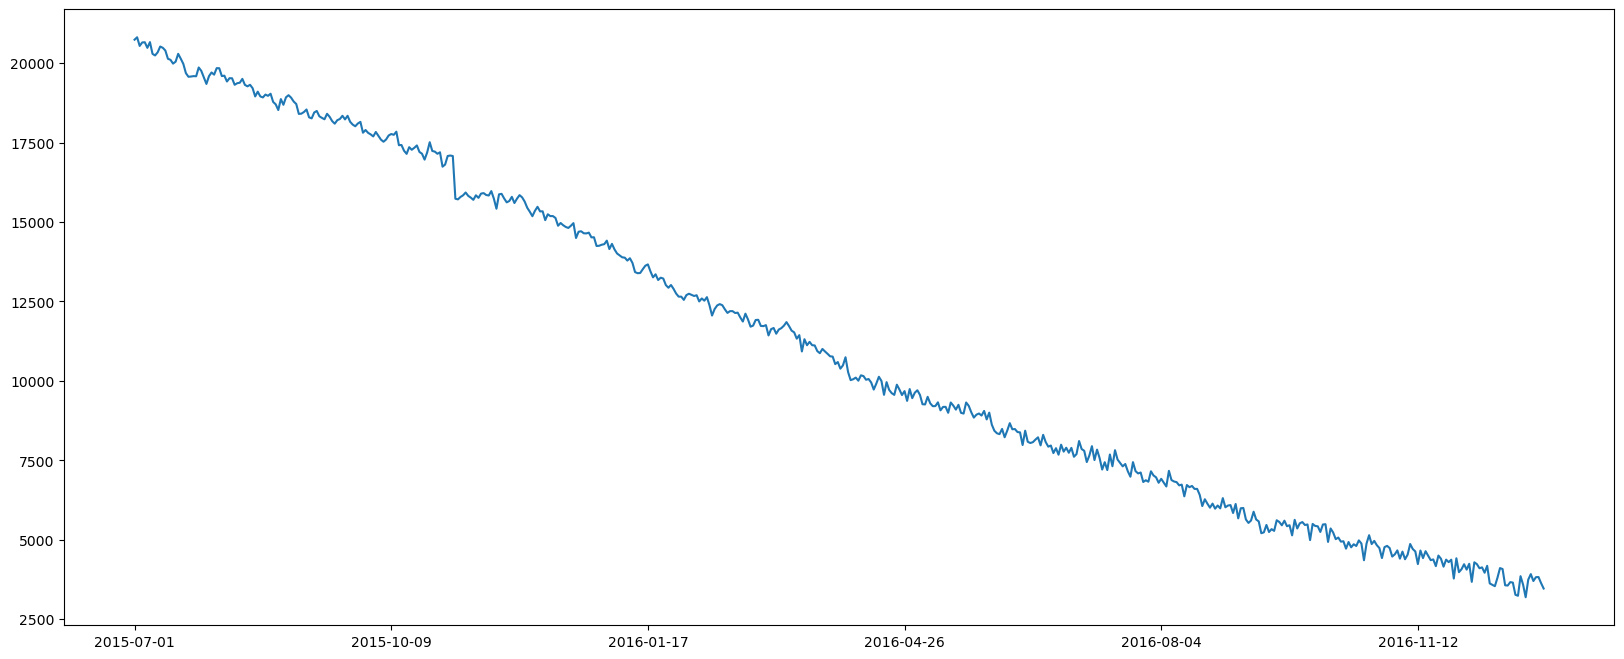

In [14]:
plt.figure(figsize=(20,8))
dates=df.columns[1:]


df.isna().sum()[dates].plot(linestyle='-')

<div style="font-size: 20px; text-align: justify;"><br><br><ul> We can clearly see that the number of missing values are decreasing over time. <br><br></div>

In [15]:
# data=df

# data = data.set_index('Page') 

# data.columns = pd.to_datetime(data.columns, errors='coerce')


# monthly_missing = data.isnull().resample('M', axis=1).sum()



# plt.figure(figsize=(20, 6))
# sns.heatmap(monthly_missing.T, cmap='Blues', cbar=True, yticklabels=True)
# plt.title("Missing Data by Month")
# plt.xlabel("Pages")
# plt.ylabel("Months")
# plt.show()


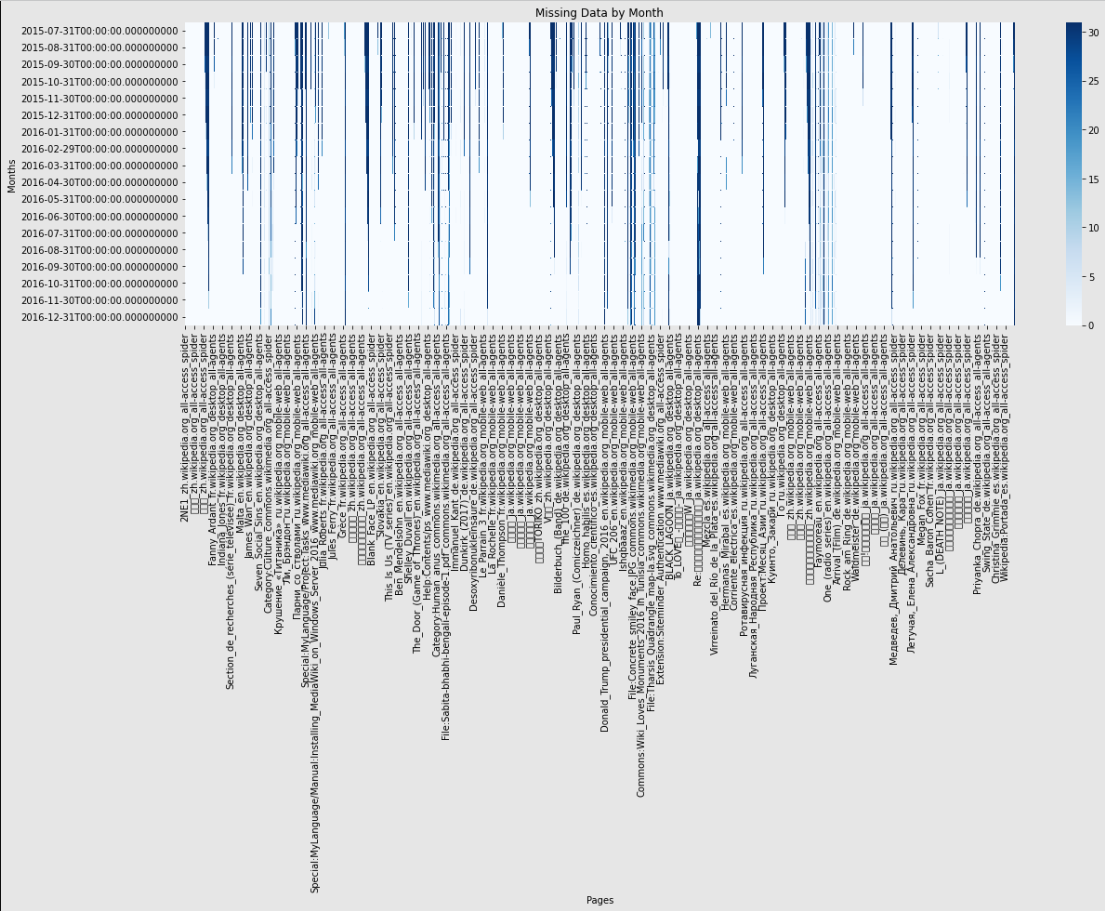

<div style="font-size: 20px; text-align: justify;"><br><br><ul> There are high number of missing values for many websites. So dropping the websites having more than 50% missing values. <br><br></div>


In [16]:
df = df.dropna(thresh=int(0.5 * df.shape[1]), axis=0)

In [17]:
df.shape

(134608, 551)

<div style="font-size: 20px; text-align: justify;"><br><br><ul>Filling the missing values using linear interpolation. <br><br></div>


In [18]:
# data_long = df.reset_index().melt(id_vars='Page', var_name='Date', value_name='Views')
# data_long['Date'] = pd.to_datetime(data_long['Date'], errors='coerce')
# data_long = data_long.sort_values(['Page', 'Date'])

# data_long['Views'] = data_long.groupby('Page')['Views'].apply(lambda x: x.interpolate(method='linear'))


# df_int = data_long.pivot(index='Page', columns='Date', values='Views')



In [19]:
df_int=pd.read_csv(r"C:\Users\devip\Desktop\Scaler projects\Ad_ease\df_int.csv")
df_int=df_int.drop('Unnamed: 1',axis=1)
df_int.head()

Page  2015-07-01  2015-07-02  \
0       !vote_en.wikipedia.org_all-access_all-agents         3.0         4.0   
1           !vote_en.wikipedia.org_all-access_spider         0.0         0.0   
2          !vote_en.wikipedia.org_desktop_all-agents         3.0         4.0   
3  "Heroes"_(David_Bowie_album)_en.wikipedia.org_...         NaN         NaN   
4  "Heroes"_(David_Bowie_album)_en.wikipedia.org_...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         7.0         4.0         4.0         2.0         3.0         7.0   
1         1.0         2.0         0.0         1.0         0.0         0.0   
2         7.0         4.0         4.0         2.0         3.0         7.0   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0         2.0  ...         3.0         1.0         6.0         3.0   
1         2.0  ...         2.0         0.0         2.0         2.0   
2         2.0  ...         3.0         1.0         6.0         3.0   
3         NaN  ...       731.0       679.0       625.0       595.0   
4         NaN  ...        26.0        22.0        13.0        11.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0         1.0         1.0         4.0         3.0         1.0         1.0  
1         0.0         0.0         1.0         1.0         1.0         0.0  
2         1.0         1.0         3.0         3.0         1.0         0.0  
3       767.0       986.0       838.0       962.0       993.0       881.0  
4        10.0        11.0         6.0        42.0         8.0        14.0  

[5 rows x 551 columns]

In [20]:
df_int = df_int.sort_index(axis=1)
df_int

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
0              3.0         4.0         7.0         4.0         4.0   
1              0.0         0.0         1.0         2.0         0.0   
2              3.0         4.0         7.0         4.0         4.0   
3              NaN         NaN         NaN         NaN         NaN   
4              NaN         NaN         NaN         NaN         NaN   
...            ...         ...         ...         ...         ...   
134603       154.0       182.0       168.0       153.0        92.0   
134604      5438.0      5966.0      5727.0      7036.0      7078.0   
134605         4.0         4.0         3.0         6.0         9.0   
134606      1077.0      1210.0      1080.0      1285.0      1296.0   
134607      4345.0      4737.0      4633.0      5737.0      5765.0   

        2015-07-06  2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  \
0              2.0         3.0         7.0         2.0         2.5  ...   
1              1.0         0.0         0.0         2.0         1.0  ...   
2              2.0         3.0         7.0         2.0         2.5  ...   
3              NaN         NaN         NaN         NaN         NaN  ...   
4              NaN         NaN         NaN         NaN         NaN  ...   
...            ...         ...         ...         ...         ...  ...   
134603       157.0       224.0       155.0       128.0       187.0  ...   
134604      5009.0      4559.0      4544.0      4191.0      3713.0  ...   
134605         4.0         9.0         7.0         5.0         3.0  ...   
134606      1105.0       969.0      1004.0       985.0       839.0  ...   
134607      3889.0      3579.0      3530.0      3199.0      2862.0  ...   

        2016-12-23  2016-12-24  2016-12-25  2016-12-26  2016-12-27  \
0              1.0         6.0         3.0         1.0         1.0   
1              0.0         2.0         2.0         0.0         0.0   
2              1.0         6.0         3.0         1.0         1.0   
3            679.0       625.0       595.0       767.0       986.0   
4             22.0        13.0        11.0        10.0        11.0   
...            ...         ...         ...         ...         ...   
134603       127.0       134.0       132.0       192.0       165.0   
134604      3340.0      3299.0      3269.0      2838.0      3149.0   
134605       250.0       198.0       226.0       180.0       193.0   
134606       771.0       790.0       850.0       762.0       804.0   
134607      2559.0      2500.0      2409.0      2067.0      2336.0   

        2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
0              4.0         3.0         1.0         1.0   
1              1.0         1.0         1.0         0.0   
2              3.0         3.0         1.0         0.0   
3            838.0       962.0       993.0       881.0   
4              6.0        42.0         8.0        14.0   
...            ...         ...         ...         ...   
134603       159.0       172.0       130.0       137.0   
134604      3268.0      4228.0      3585.0      4179.0   
134605       233.0       277.0       226.0       287.0   
134606       805.0       904.0       786.0       761.0   
134607      2455.0      3302.0      2789.0      3410.0   

                                                     Page  
0            !vote_en.wikipedia.org_all-access_all-agents  
1                !vote_en.wikipedia.org_all-access_spider  
2               !vote_en.wikipedia.org_desktop_all-agents  
3       "Heroes"_(David_Bowie_album)_en.wikipedia.org_...  
4       "Heroes"_(David_Bowie_album)_en.wikipedia.org_...  
...                                                   ...  
134603        대문_commons.wikimedia.org_desktop_all-agents  
134604  ［Alexandros］_ja.wikipedia.org_all-access_all-a...  
134605    ［Alexandros］_ja.wikipedia.org_all-access_spider  
134606   ［Alexandros］_ja.wikipedia.org_desktop_all-agents  
134607  ［Alexandros］_ja.wikipedia.org_mobile-web_all-a...  

[134608

In [21]:
df_int.isna().sum(axis=1).sort_values(ascending=False)

18787     276
18789     276
80510     276
80511     276
80512     276
         ... 
46891       0
46890       0
46889       0
46888       0
134607      0
Length: 134608, dtype: int64

<div style="font-size: 20px; text-align: justify;"><br><br><ul>Filling the rest of the missing values using forward and backward fill. <br><br></div>


In [22]:

df_int2 = df_int.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)


In [23]:
df_int2.isna().sum(axis=0).sort_values(ascending=False)

2015-07-01    0
2016-07-05    0
2016-06-29    0
2016-06-30    0
2016-07-01    0
             ..
2015-12-26    0
2015-12-25    0
2015-12-24    0
2015-12-23    0
Page          0
Length: 551, dtype: int64

<br><br><div style="font-size: 20px; text-align: justify;"><br><br>c.  Extraction of language code. <br><br></div>

In [24]:
df_int2=df_int2.reset_index()

In [25]:
import re

pattern="_([a-zA-Z]+)\.wikipedia"

df_int2['language']=df_int2['Page'].apply(lambda x : re.search(pattern, x,re.IGNORECASE).group(1) if re.search(pattern, x) else 'unknown')

In [26]:
df_int2['language'].value_counts()

language
en         22676
ja         19383
de         17448
fr         17041
zh         15387
unknown    14762
ru         14334
es         13577
Name: count, dtype: int64

In [27]:
df_int2[df_int2.duplicated()]

Empty DataFrame
Columns: [index, 2015-07-01, 2015-07-02, 2015-07-03, 2015-07-04, 2015-07-05, 2015-07-06, 2015-07-07, 2015-07-08, 2015-07-09, 2015-07-10, 2015-07-11, 2015-07-12, 2015-07-13, 2015-07-14, 2015-07-15, 2015-07-16, 2015-07-17, 2015-07-18, 2015-07-19, 2015-07-20, 2015-07-21, 2015-07-22, 2015-07-23, 2015-07-24, 2015-07-25, 2015-07-26, 2015-07-27, 2015-07-28, 2015-07-29, 2015-07-30, 2015-07-31, 2015-08-01, 2015-08-02, 2015-08-03, 2015-08-04, 2015-08-05, 2015-08-06, 2015-08-07, 2015-08-08, 2015-08-09, 2015-08-10, 2015-08-11, 2015-08-12, 2015-08-13, 2015-08-14, 2015-08-15, 2015-08-16, 2015-08-17, 2015-08-18, 2015-08-19, 2015-08-20, 2015-08-21, 2015-08-22, 2015-08-23, 2015-08-24, 2015-08-25, 2015-08-26, 2015-08-27, 2015-08-28, 2015-08-29, 2015-08-30, 2015-08-31, 2015-09-01, 2015-09-02, 2015-09-03, 2015-09-04, 2015-09-05, 2015-09-06, 2015-09-07, 2015-09-08, 2015-09-09, 2015-09-10, 2015-09-11, 2015-09-12, 2015-09-13, 2015-09-14, 2015-09-15, 2015-09-16, 2015-09-17, 2015-09-18, 2015-09-19, 2015-09-20, 2015-09-21, 2015-09-22, 2015-09-23, 2015-09-24, 2015-09-25, 2015-09-26, 2015-09-27, 2015-09-28, 2015-09-29, 2015-09-30, 2015-10-01, 2015-10-02, 2015-10-03, 2015-10-04, 2015-10-05, 2015-10-06, 2015-10-07, ...]
Index: []

[0 rows x 553 columns]

<br><br><div style="font-size: 20px; text-align: justify;"><br><br>There are no duplicated rows. <br><br></div>

<br><br><div style="font-size: 20px; text-align: justify;"><br><br>2.  Exploratory Data Analysis. <br><br></div>

<div style="font-size: 20px; text-align: justify;"><ul>Extracting columns Access Type and Traffic type from url.</ul><br><br></div>

In [28]:
Acc_trfc = r'_(all-access|desktop|mobile-web)_(all-agents|spider)'

df_int2[['Access_Type', 'Traffic_Type']] = df_int2['Page'].str.extract(Acc_trfc)

In [29]:
print('Access Type \n--------------------\n',df_int2['Access_Type'].value_counts(),'\n\n\n','Traffic Type\n---------------\n',df_int2['Traffic_Type'].value_counts())

Access Type 
--------------------
 Access_Type
all-access    69226
mobile-web    33531
desktop       31851
Name: count, dtype: int64 


 Traffic Type
---------------
 Traffic_Type
all-agents    102068
spider         32540
Name: count, dtype: int64


In [30]:
df_int2 = df_int2.loc[:, df_int2.columns.notna()]

<div style="font-size: 20px; text-align: justify;"><br><br><ul>Creating column total views as sum of the views on that url across all the dates. </ul><br><br></div>

In [31]:
df_int2['Total_views']=df_int2.loc[:, ~df_int2.columns.isin(['Page', 'language', 'Access_Type', 'Traffic_Type'])].sum(axis=1)

In [32]:
df_int2.head()

index  2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
0      0         3.0         4.0         7.0         4.0         4.0   
1      1         0.0         0.0         1.0         2.0         0.0   
2      2         3.0         4.0         7.0         4.0         4.0   
3      3       201.0       201.0       201.0       201.0       201.0   
4      4        12.0        12.0        12.0        12.0        12.0   

   2015-07-06  2015-07-07  2015-07-08  2015-07-09  ...  2016-12-27  \
0         2.0         3.0         7.0         2.0  ...         1.0   
1         1.0         0.0         0.0         2.0  ...         0.0   
2         2.0         3.0         7.0         2.0  ...         1.0   
3       201.0       201.0       201.0       201.0  ...       986.0   
4        12.0        12.0        12.0        12.0  ...        11.0   

   2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
0         4.0         3.0         1.0         1.0   
1         1.0         1.0         1.0         0.0   
2         3.0         3.0         1.0         0.0   
3       838.0       962.0       993.0       881.0   
4         6.0        42.0         8.0        14.0   

                                                Page  language  Access_Type  \
0       !vote_en.wikipedia.org_all-access_all-agents        en   all-access   
1           !vote_en.wikipedia.org_all-access_spider        en   all-access   
2          !vote_en.wikipedia.org_desktop_all-agents        en      desktop   
3  "Heroes"_(David_Bowie_album)_en.wikipedia.org_...        en   all-access   
4  "Heroes"_(David_Bowie_album)_en.wikipedia.org_...        en   all-access   

   Traffic_Type  Total_views  
0    all-agents       1954.0  
1        spider        957.0  
2    all-agents       1792.0  
3    all-agents     659041.0  
4        spider       8839.0  

[5 rows x 556 columns]

<br><br><div style="font-size: 20px; text-align: justify;"><br><br><ul>a.  Analysis of categorical columns.</ul> <br><br></div>

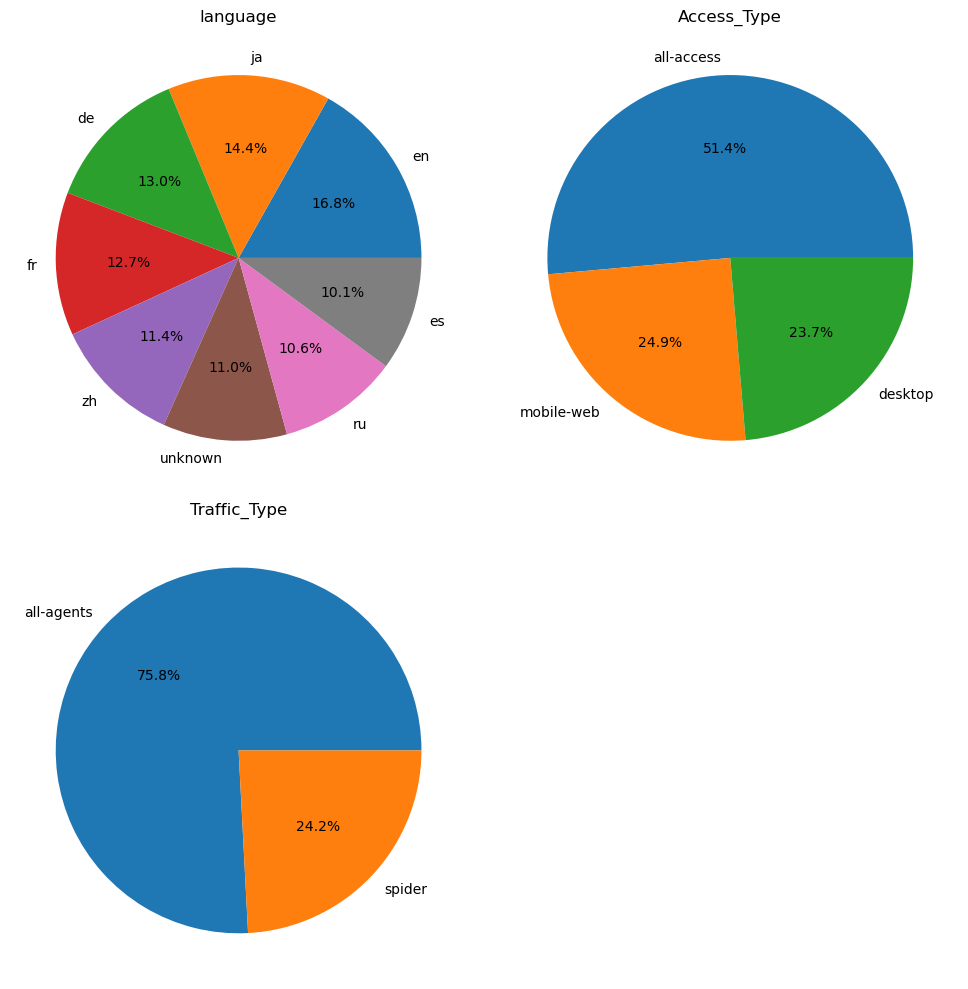

In [33]:
from IPython.display import display
no=1
cat_cols=['language', 'Access_Type', 'Traffic_Type']

plt.figure(figsize=(10,10))
for i in cat_cols:
    plt.subplot(2,2,no)
        
    plt.title(i)
    datacol=df_int2.groupby(i).size().sort_values(ascending=False).head(10)

    
    plt.pie(x=datacol,labels=datacol.index,autopct='%1.1f%%')

    #display(datacol.to_frame(name='count').reset_index())
    #print('\n\n')
    no+=1
plt.tight_layout()
plt.show()
    
    

language  Count
0       en  22676
1       ja  19383
2       de  17448
3       fr  17041
4       zh  15387
5  unknown  14762
6       ru  14334
7       es  13577

Access_Type  Count
0  all-access  69226
1  mobile-web  33531
2     desktop  31851

Traffic_Type   Count
0   all-agents  102068
1       spider   32540

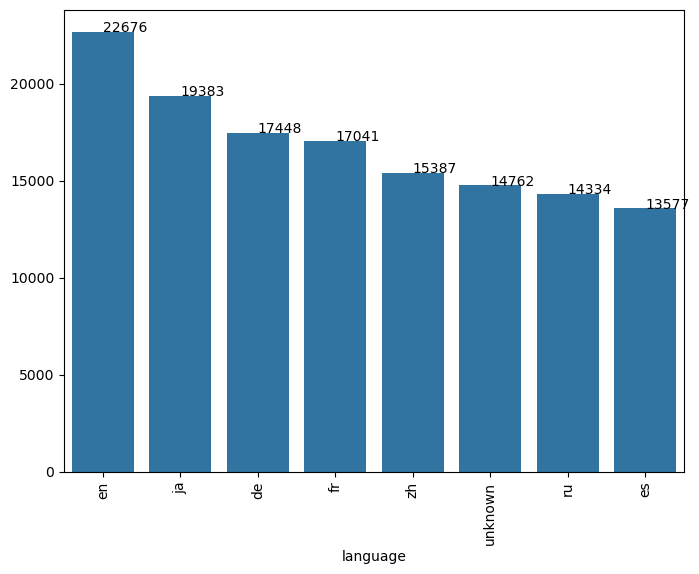

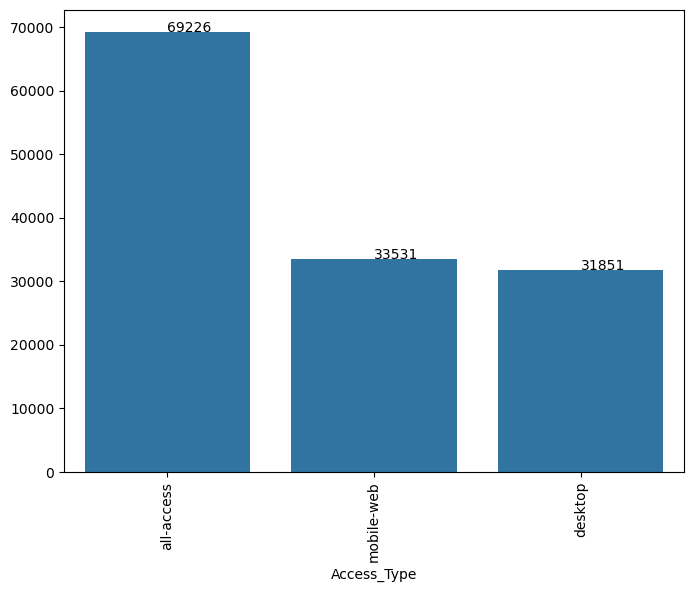

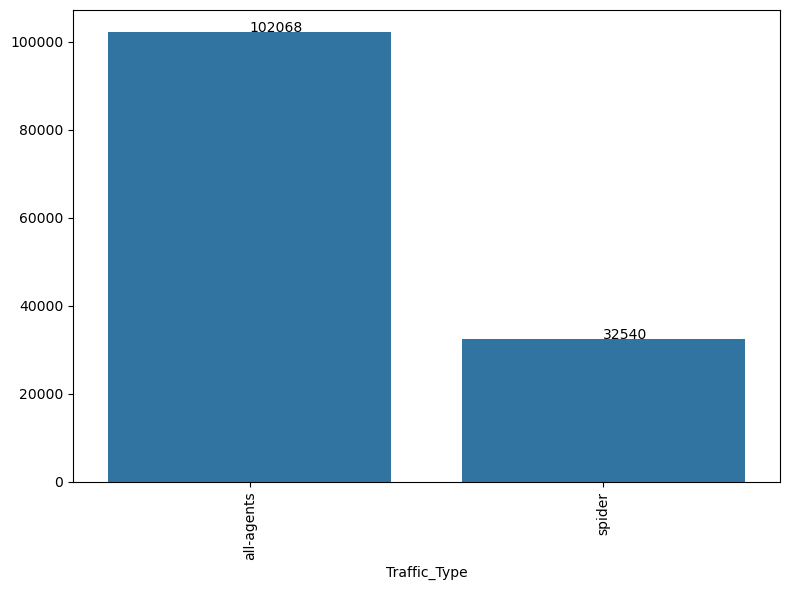

In [34]:

for col in cat_cols:

    groupcol=df_int2.groupby(col).size().sort_values(ascending=False).head(10)
   

    plt.figure(figsize=(8,6))
    #plt.title(i)
    #plt.subplot(4,1,n)
    sns.barplot(x=groupcol.index,y=groupcol.values, order=groupcol.index)
    for index,value in enumerate(groupcol):
        plt.text(index,value,value)
    display(groupcol.to_frame(name='Count').reset_index())
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
 

    

plt.show()

<div style="font-size: 20px; text-align: justify;"><br><br><ul><u>Analysis of categorical columns</u></ul><br><br><br>
<li> The dataset has 145063 unique wikipedia urls.<br><br>
<li> Majority of the websites (16%) are in language English, followed by 14% in Japaneese.<br><br>
<li> Access type for majority websites is all access (51%), 25% are of mobile access and rest are desktop.<br><br>
<li>The Traffic type is all agents for 75% and spider for 25%.<br><br>

     
     
<br><br>
      
     
    
 </div>

In [35]:

if 'Date' in df_int2.columns:
    df_int2 = df_int2.drop(columns=['Date'])


df_int2 = df_int2.reset_index(drop=True)
df_int2.index.name = 'Index'


df_int2


index  2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
Index                                                                        
0            0         3.0         4.0         7.0         4.0         4.0   
1            1         0.0         0.0         1.0         2.0         0.0   
2            2         3.0         4.0         7.0         4.0         4.0   
3            3       201.0       201.0       201.0       201.0       201.0   
4            4        12.0        12.0        12.0        12.0        12.0   
...        ...         ...         ...         ...         ...         ...   
134603  134603       154.0       182.0       168.0       153.0        92.0   
134604  134604      5438.0      5966.0      5727.0      7036.0      7078.0   
134605  134605         4.0         4.0         3.0         6.0         9.0   
134606  134606      1077.0      1210.0      1080.0      1285.0      1296.0   
134607  134607      4345.0      4737.0      4633.0      5737.0      5765.0   

        2015-07-06  2015-07-07  2015-07-08  2015-07-09  ...  2016-12-27  \
Index                                                   ...               
0              2.0         3.0         7.0         2.0  ...         1.0   
1              1.0         0.0         0.0         2.0  ...         0.0   
2              2.0         3.0         7.0         2.0  ...         1.0   
3            201.0       201.0       201.0       201.0  ...       986.0   
4             12.0        12.0        12.0        12.0  ...        11.0   
...            ...         ...         ...         ...  ...         ...   
134603       157.0       224.0       155.0       128.0  ...       165.0   
134604      5009.0      4559.0      4544.0      4191.0  ...      3149.0   
134605         4.0         9.0         7.0         5.0  ...       193.0   
134606      1105.0       969.0      1004.0       985.0  ...       804.0   
134607      3889.0      3579.0      3530.0      3199.0  ...      2336.0   

        2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
Index                                                    
0              4.0         3.0         1.0         1.0   
1              1.0         1.0         1.0         0.0   
2              3.0         3.0         1.0         0.0   
3            838.0       962.0       993.0       881.0   
4              6.0        42.0         8.0        14.0   
...            ...         ...         ...         ...   
134603       159.0       172.0       130.0       137.0   
134604      3268.0      4228.0      3585.0      4179.0   
134605       233.0       277.0       226.0       287.0   
134606       805.0       904.0       786.0       761.0   
134607      2455.0      3302.0      2789.0      3410.0   

                                                     Page  language  \
Index                                                                 
0            !vote_en.wikipedia.org_all-access_all-agents        en   
1                !vote_en.wikipedia.org_all-access_spider        en   
2               !vote_en.wikipedia.org_desktop_all-agents        en   
3       "Heroes"_(David_Bowie_album)_en.wikipedia.org_...        en   
4       "Heroes"_(David_Bowie_album)_en.wikipedia.org_...        en   
...                                                   ...       ...   
134603        대문_commons.wikimedia.org_desktop_all-agents   unknown   
134604  ［Alexandros］_ja.wikipedia.org_all-access_all-a...        ja   
134605    ［Alexandros］_ja.wikipedia.org_all-access_spider        ja   
134606   ［Alexandros］_ja.wikipedia.org_desktop_all-agents        ja   
134607  ［Alexandros］_ja.wikipedia.org_mobile-web_all-a...        ja   

        Access_Type  Traffic_Type  Total_views  
Index                                           
0        all-access    all-agents       1954.0  
1        all-access        spider        957.0  
2           desktop    all-agents       1792.0  
3        all-access    all-agents     659041.0  
4        all-access        spider       8839.

<div style="font-size: 20px; text-align: justify;"><br><br>b. Top 10 websites with most views.<br><br></div>

Page   Total_views
0   Main_Page_en.wikipedia.org_all-access_all-agents  1.206624e+10
1      Main_Page_en.wikipedia.org_desktop_all-agents  8.774552e+09
2   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.154039e+09
3  Wikipedia:Hauptseite_de.wikipedia.org_all-acce...  1.604021e+09
4  Special:Search_en.wikipedia.org_all-access_all...  1.304156e+09
5  Wikipedia:Hauptseite_de.wikipedia.org_mobile-w...  1.112776e+09
6  Заглавная_страница_ru.wikipedia.org_all-access...  1.086113e+09
7  Special:Search_en.wikipedia.org_desktop_all-ag...  1.011924e+09
8  Wikipédia:Accueil_principal_fr.wikipedia.org_a...  8.685674e+08
9  Wikipedia:Portada_es.wikipedia.org_all-access_...  7.515790e+08

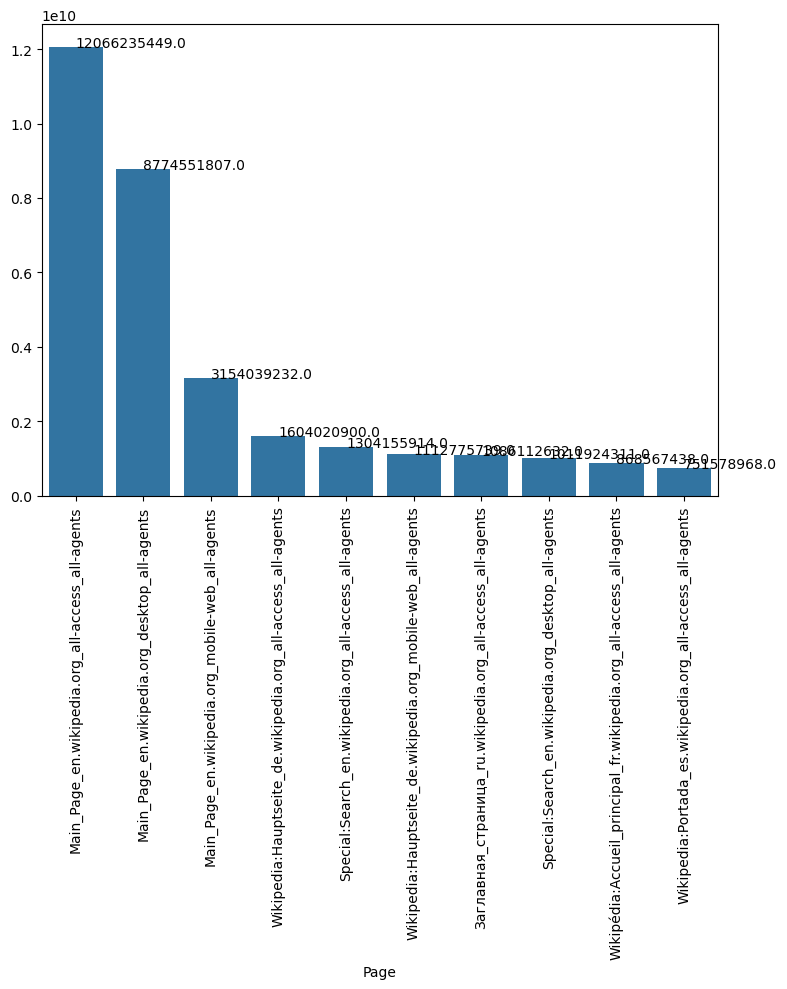

In [36]:
groupcol=df_int2.groupby('Page')['Total_views'].sum().sort_values(ascending=False).head(10)
   

plt.figure(figsize=(8,10))
#plt.title(i)
#plt.subplot(4,1,n)
sns.barplot(x=groupcol.index,y=groupcol.values, order=groupcol.index)
for index,value in enumerate(groupcol):
    plt.text(index,value,value)
display(groupcol.to_frame(name='Total_views').reset_index())
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [37]:
top_sites=df_int2[df_int2.Page.isin(groupcol.index[:5])]

In [38]:
top_sites


index  2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
Index                                                                      
54347  54347  20381245.0  20752194.0  19573967.0  20439645.0  20772109.0   
54349  54349  11952559.0  12344021.0  11195848.0  11982470.0  12379684.0   
54350  54350   8039732.0   8018607.0   7980511.0   8024814.0   7929962.0   
76561  76561   2034850.0   1984412.0   1763117.0   1620136.0   1766701.0   
86652  86652   2983623.0   2965848.0   2900702.0   2687450.0   2827409.0   

       2015-07-06  2015-07-07  2015-07-08  2015-07-09  ...  2016-12-27  \
Index                                                  ...               
54347  22544669.0  21210887.0  19107911.0  19993848.0  ...  26916991.0   
54349  14164829.0  12917172.0  11089923.0  12067334.0  ...  20065005.0   
54350   7959839.0   7892357.0   7607871.0   7515302.0  ...   4097335.0   
76561   2108408.0   2118720.0   2052391.0   2300186.0  ...   1902057.0   
86652   3062343.0   2999196.0   2995270.0   2995810.0  ...   3907598.0   

       2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
Index                                                   
54347  27025053.0  26073819.0  24363967.0  26149541.0   
54349  19751910.0  19211634.0  17100925.0  19591761.0   
54350   4168668.0   4100929.0   4118692.0   3939419.0   
76561   1816849.0   1895763.0   1811624.0   1576945.0   
86652   3732014.0   3577128.0   3514084.0   3286214.0   

                                                    Page  language  \
Index                                                                
54347   Main_Page_en.wikipedia.org_all-access_all-agents        en   
54349      Main_Page_en.wikipedia.org_desktop_all-agents        en   
54350   Main_Page_en.wikipedia.org_mobile-web_all-agents        en   
76561  Special:Search_en.wikipedia.org_all-access_all...        en   
86652  Wikipedia:Hauptseite_de.wikipedia.org_all-acce...        de   

       Access_Type  Traffic_Type   Total_views  
Index                                           
54347   all-access    all-agents  1.206624e+10  
54349      desktop    all-agents  8.774552e+09  
54350   mobile-web    all-agents  3.154039e+09  
76561   all-access    all-agents  1.304156e+09  
86652   all-access    all-agents  1.604021e+09  

[5 rows x 556 columns]

C:\Users\devip\AppData\Local\Temp\ipykernel_16360\1440513726.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long['Date'] = pd.to_datetime(df_long['Date'], errors='coerce')


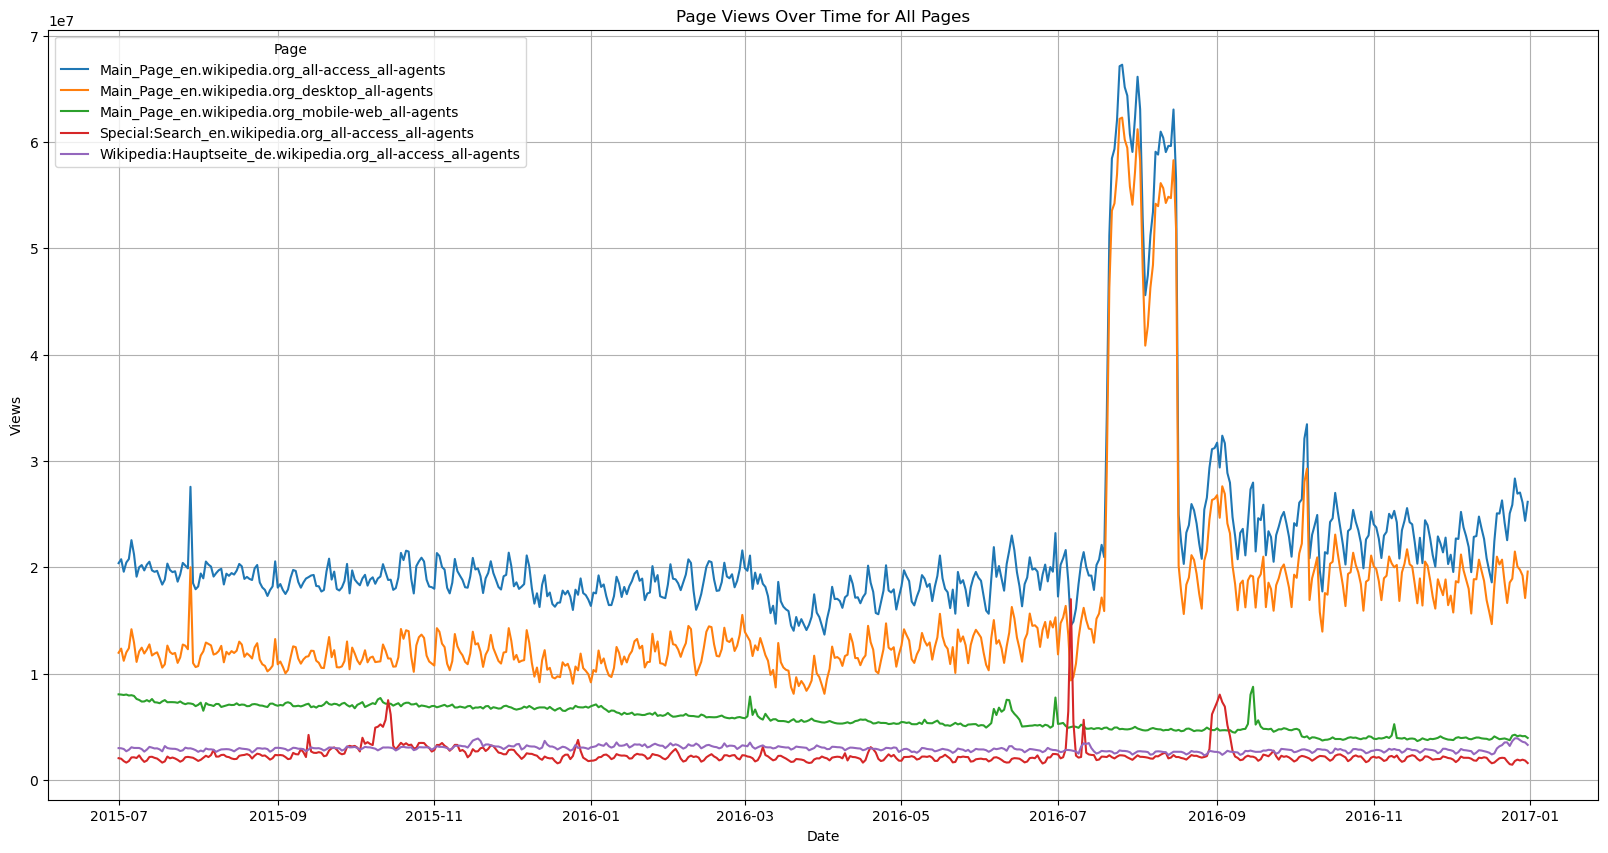

In [39]:
id_vars = ['Page', 'language', 'Access_Type', 'Traffic_Type', 'Total_views']


df_long = pd.melt(top_sites, id_vars=id_vars, var_name='Date', value_name='Views')


df_long['Date'] = pd.to_datetime(df_long['Date'], errors='coerce')

plt.figure(figsize=(20,10))

for page in df_long['Page'].unique():
    page_data = df_long[df_long['Page'] == page]
    plt.plot(page_data['Date'], page_data['Views'], label=page)


plt.title('Page Views Over Time for All Pages')
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend(title='Page') 
plt.grid(True)
plt.show()

<div style="font-size: 20px; text-align: justify;"><br><br>We can see that Main page of Wikipedia from all access types are the most viewed pages.There is a spike in views of wikipedia main pages between July and September of 2016.<br><br></div>

<div style="font-size: 20px; text-align: justify;"><br><br>c. Analysis by Date.<br><br></div>

In [40]:
df_sample=df_int2.sample(10000)
df_intlong=pd.melt(df_sample,id_vars=id_vars, var_name='Date', value_name='Views')


In [41]:
if not pd.api.types.is_datetime64_any_dtype(df_intlong['Date']):
    df_intlong['Date'] = pd.to_datetime(df_intlong['Date'], errors='coerce')

df_intlong['Monthno'] = df_intlong['Date'].dt.month
df_intlong['Yearno'] = df_intlong['Date'].dt.year


df_intlong


C:\Users\devip\AppData\Local\Temp\ipykernel_16360\2783405011.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_intlong['Date'] = pd.to_datetime(df_intlong['Date'], errors='coerce')


Page language  \
0        Manual:Database_access_www.mediawiki.org_mobil...  unknown   
1        Präsidentschaftswahl_in_den_Vereinigten_Staate...       de   
2        オール・ユー・ニード・イズ・キル_ja.wikipedia.org_all-access_s...       ja   
3               Sirikit_de.wikipedia.org_all-access_spider       de   
4        Fernando_Carrillo_(actor)_es.wikipedia.org_mob...       es   
...                                                    ...      ...   
5509995  Marvel_Comics_en.wikipedia.org_desktop_all-agents       en   
5509996     4._Oktober_de.wikipedia.org_desktop_all-agents       de   
5509997  Harry_Markopolos_en.wikipedia.org_all-access_s...       en   
5509998     Sarah_Palin_en.wikipedia.org_all-access_spider       en   
5509999  Фассбендер,_Майкл_ru.wikipedia.org_all-access_...       ru   

        Access_Type Traffic_Type  Total_views       Date     Views  Monthno  \
0        mobile-web   all-agents      57019.0        NaT   54869.0      NaN   
1        all-access       spider      69390.0        NaT   67559.0      NaN   
2        all-access       spider     126244.0        NaT  104187.0      NaN   
3        all-access       spider      76778.0        NaT   74462.0      NaN   
4        mobile-web   all-agents     175847.0        NaT   28447.0      NaN   
...             ...          ...          ...        ...       ...      ...   
5509995     desktop   all-agents    1523070.0 2016-12-31    1388.0     12.0   
5509996     desktop   all-agents      61722.0 2016-12-31      26.0     12.0   
5509997  all-access       spider      48581.0 2016-12-31      10.0     12.0   
5509998  all-access       spider     145948.0 2016-12-31      91.0     12.0   
5509999  all-access       spider     114960.0 2016-12-31      37.0     12.0   

         Yearno  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
5509995  2016.0  
5509996  2016.0  
5509997  2016.0  
5509998  2016.0  
5509999  2016.0  

[5510000 rows x 9 columns]

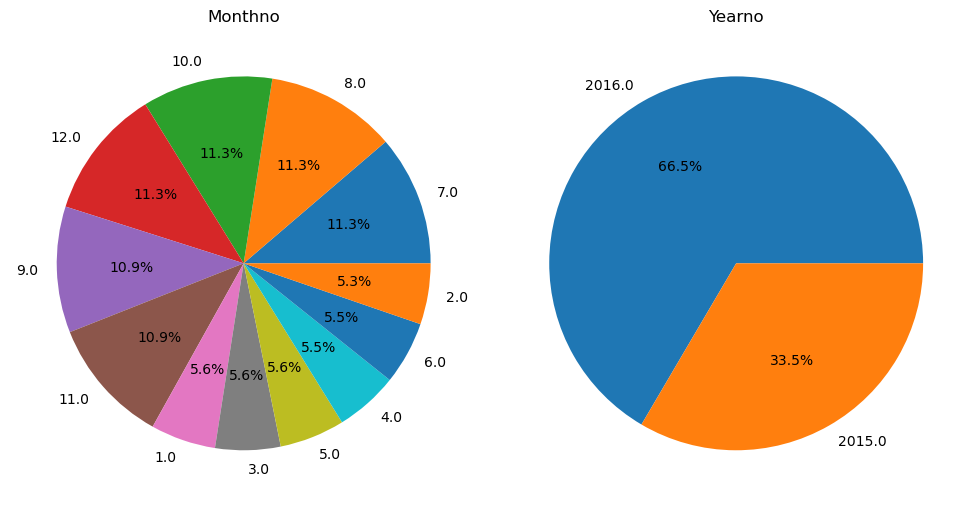

In [42]:

no=1
date_cols=['Monthno','Yearno']

plt.figure(figsize=(10,10))
for i in date_cols:
    plt.subplot(2,2,no)
        
    plt.title(i)
    datacol=df_intlong.groupby(i)['Total_views'].sum().sort_values(ascending=False).head(12)

    
    plt.pie(x=datacol,labels=datacol.index,autopct='%1.1f%%')

    #display(datacol.to_frame(name='count').reset_index())
    #print('\n\n')
    no+=1
plt.tight_layout()
plt.show()
    
    

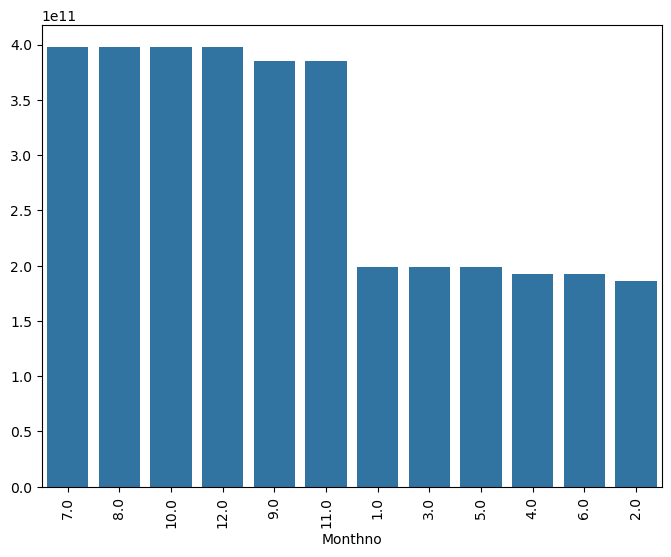

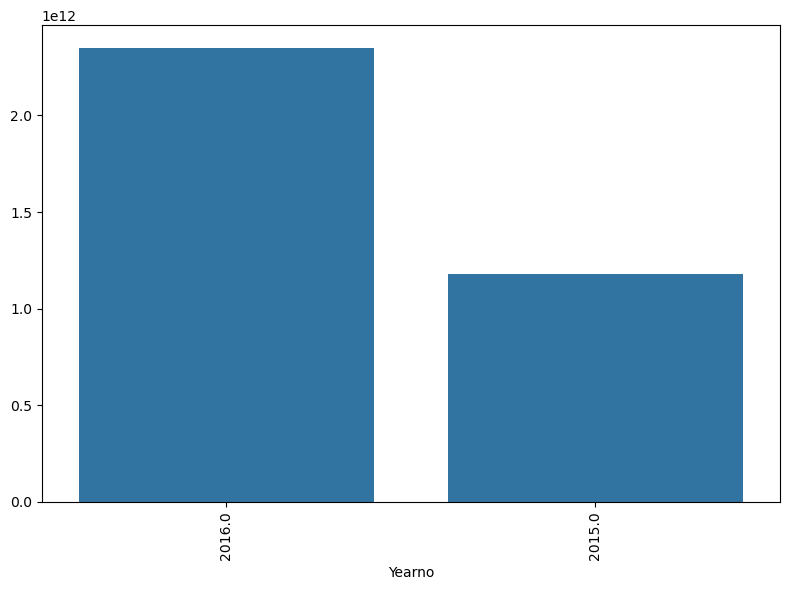

In [43]:

for col in date_cols:

    groupcol=df_intlong.groupby(col).Total_views.sum().sort_values(ascending=False).head(12)
   

    plt.figure(figsize=(8,6))
    #plt.title(i)
    #plt.subplot(4,1,n)
    sns.barplot(x=groupcol.index,y=groupcol.values, order=groupcol.index)
    
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
 

    

plt.show()

<div style="font-size: 20px; text-align: justify;"> <br><br>
<li> From the sample we have taken, we can see that the months from July to December has more views compared to months in first half of the Year.<br><br>
<li>The year 2016 has more views recorded than 2015 .<br><br>


     
     
<br><br>
      
     
    
 </div>

In [44]:

# id_vars = ['Page', 'language', 'Access_Type', 'Traffic_Type', 'Total_views']
# date_columns = df_int2.columns.difference(id_vars) 


# df_language = pd.melt(df_int2, id_vars=id_vars, value_vars=date_columns, var_name='Date', value_name='Views')


# df_language['Date'] = pd.to_datetime(df_language['Date'], errors='coerce')

# df_aggregated = df_language.groupby(['language', 'Date'])['Views'].sum().reset_index()


# df_pivoted = df_aggregated.pivot(index='Date', columns='language', values='Views')

# df_pivoted


In [45]:
df_pivoted=pd.read_csv(r"C:\Users\devip\Desktop\Scaler projects\Ad_ease\df_pivoted.csv")
df_pivoted.head()

Date            de            en            es            fr  \
0  2015-07-01  1.379858e+07  8.752270e+07  1.555703e+07  8.960182e+06   
1  2015-07-02  1.361809e+07  8.724852e+07  1.487968e+07  9.014507e+06   
2  2015-07-03  1.309213e+07  8.297736e+07  1.370636e+07  8.687563e+06   
3  2015-07-04  1.205845e+07  8.627290e+07  1.288412e+07  9.249310e+06   
4  2015-07-05  1.393040e+07  8.900837e+07  1.398777e+07  9.089911e+06   

             ja            ru       unknown            zh  
0  1.218600e+07  1.003944e+07  1.533665e+06  4.525122e+06  
1  1.394478e+07  1.020322e+07  1.605479e+06  4.531185e+06  
2  1.262576e+07  9.499020e+06  1.519080e+06  4.503103e+06  
3  1.577928e+07  8.968805e+06  1.303085e+06  4.542750e+06  
4  1.515102e+07  9.510283e+06  1.439225e+06  4.820526e+06

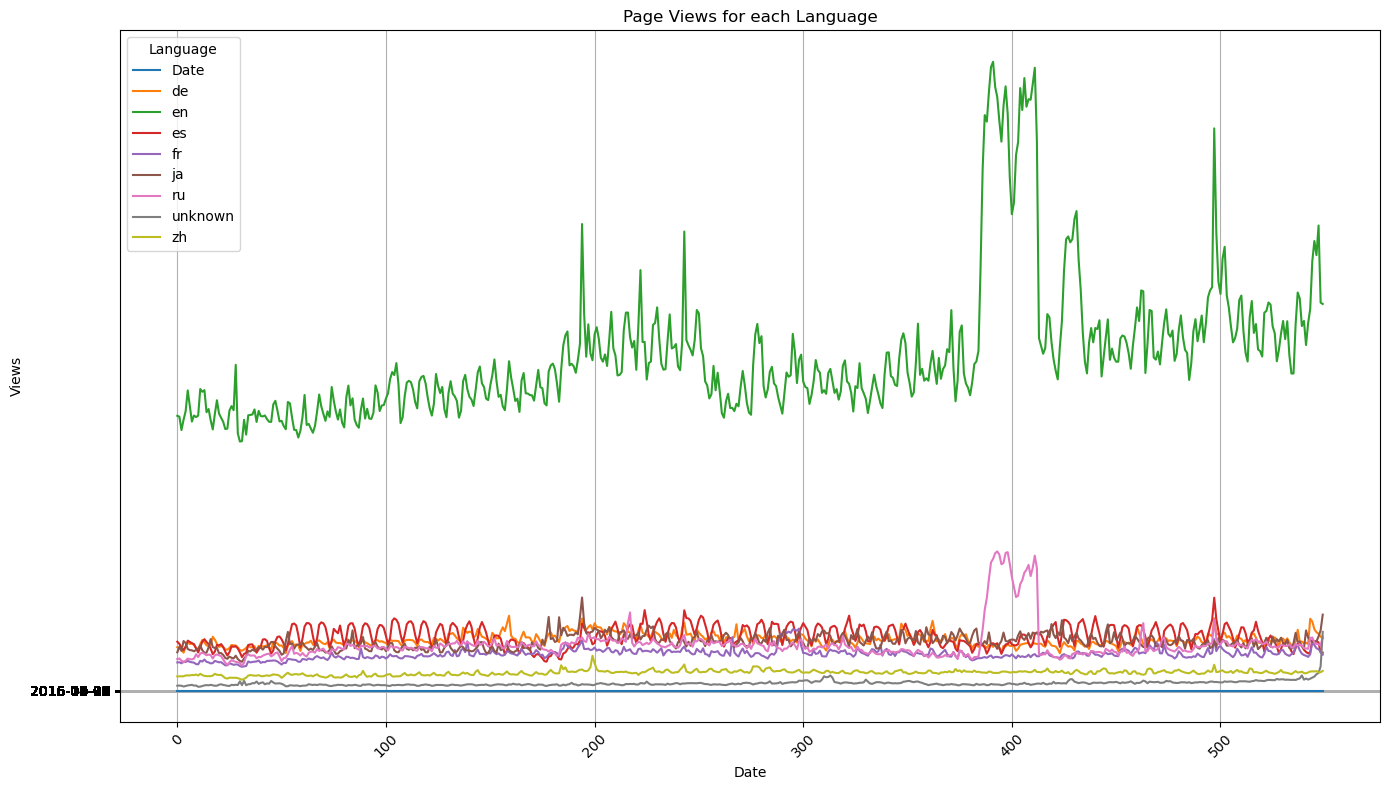

In [46]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 8))

for l in df_pivoted.columns:
    plt.plot(df_pivoted.index, df_pivoted[l], label=l)


plt.title('Page Views for each Language')
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend(title='Language')
plt.grid(True)


plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()


<div style="font-size: 20px; text-align: justify;"><ul> <br><br> We can clearly that pages in the language English are having more number of views than other languages. Both English and Russian page views are having a spike between July to September 2016. </ul><br><br>



    
 </div>

<br><br><div style="font-size: 20px; text-align: justify;"><br><br>3. Stationarity, decomposition, detrending, ACF and PACF. <br><br></div>

<div style="font-size: 20px; text-align: justify;"><ul>a. Test for Stationarity. </ul><br><br></div>

<div style="font-size: 20px; text-align: justify;">Using AdFuller test to check stationarity of each language.<br><br></div>

<div style="font-size: 20px; text-align: justify;">
<li>Null Hypothesis (H0): The Time series is non- stationary.<br><br>
<li>Alternate Hypothesis (H1): The time series is Stationary.<br><br>
<li>Significant Value : 0.05 (alpha). If p-value > 0.05 : we failed to reject Null hypothesis.<br><br></div>

In [50]:
df_pivoted['Date']=pd.to_datetime(df_pivoted['Date'])

In [52]:
from statsmodels.tsa.stattools import adfuller


def perform_adf_test(s,col):
    result = adfuller(s, autolag='AIC')
    if result[1]<=0.05:
        print(f"{col} is stationary")
    else :
        print(f"{col} is non- stationary")
    print(f"P-value :{result[1]}\n\n")


adf_results = {col: perform_adf_test(df_pivoted[col],col) for col in df_pivoted.columns}



Date is non- stationary
P-value :0.9729887812087178


de is non- stationary
P-value :0.14426908349925183


en is non- stationary
P-value :0.1385652038666897


es is stationary
P-value :0.026839898233137188


fr is stationary
P-value :0.02972736060011612


ja is non- stationary
P-value :0.06315554931410529


ru is stationary
P-value :0.0016190754553572111


unknown is non- stationary
P-value :1.0


zh is non- stationary
P-value :0.2624785424159499




<div style="font-size: 20px; text-align: justify;"><ul>The languages Spanish , French and Russian are having stationary time series.  </ul><br><br></div>

<div style="font-size: 20px; text-align: justify;">b. De-trending and de-seasoning. <br><br></div>

<div style="font-size: 20px; text-align: justify;">Giving a period of seven days to observe seasonality. <br><br></div>

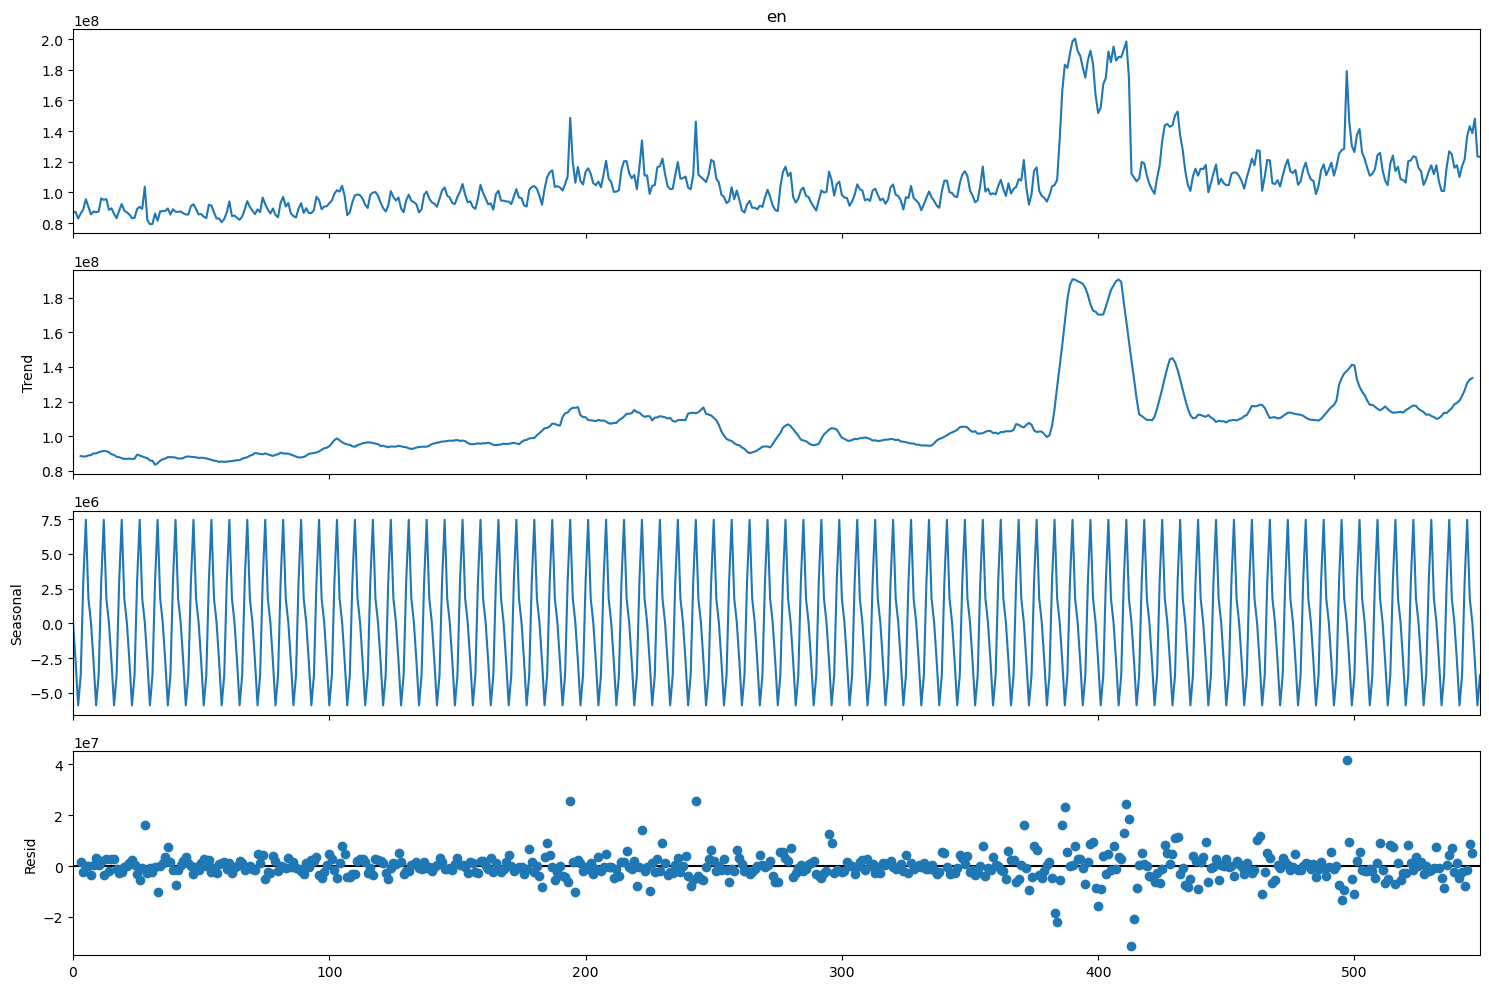

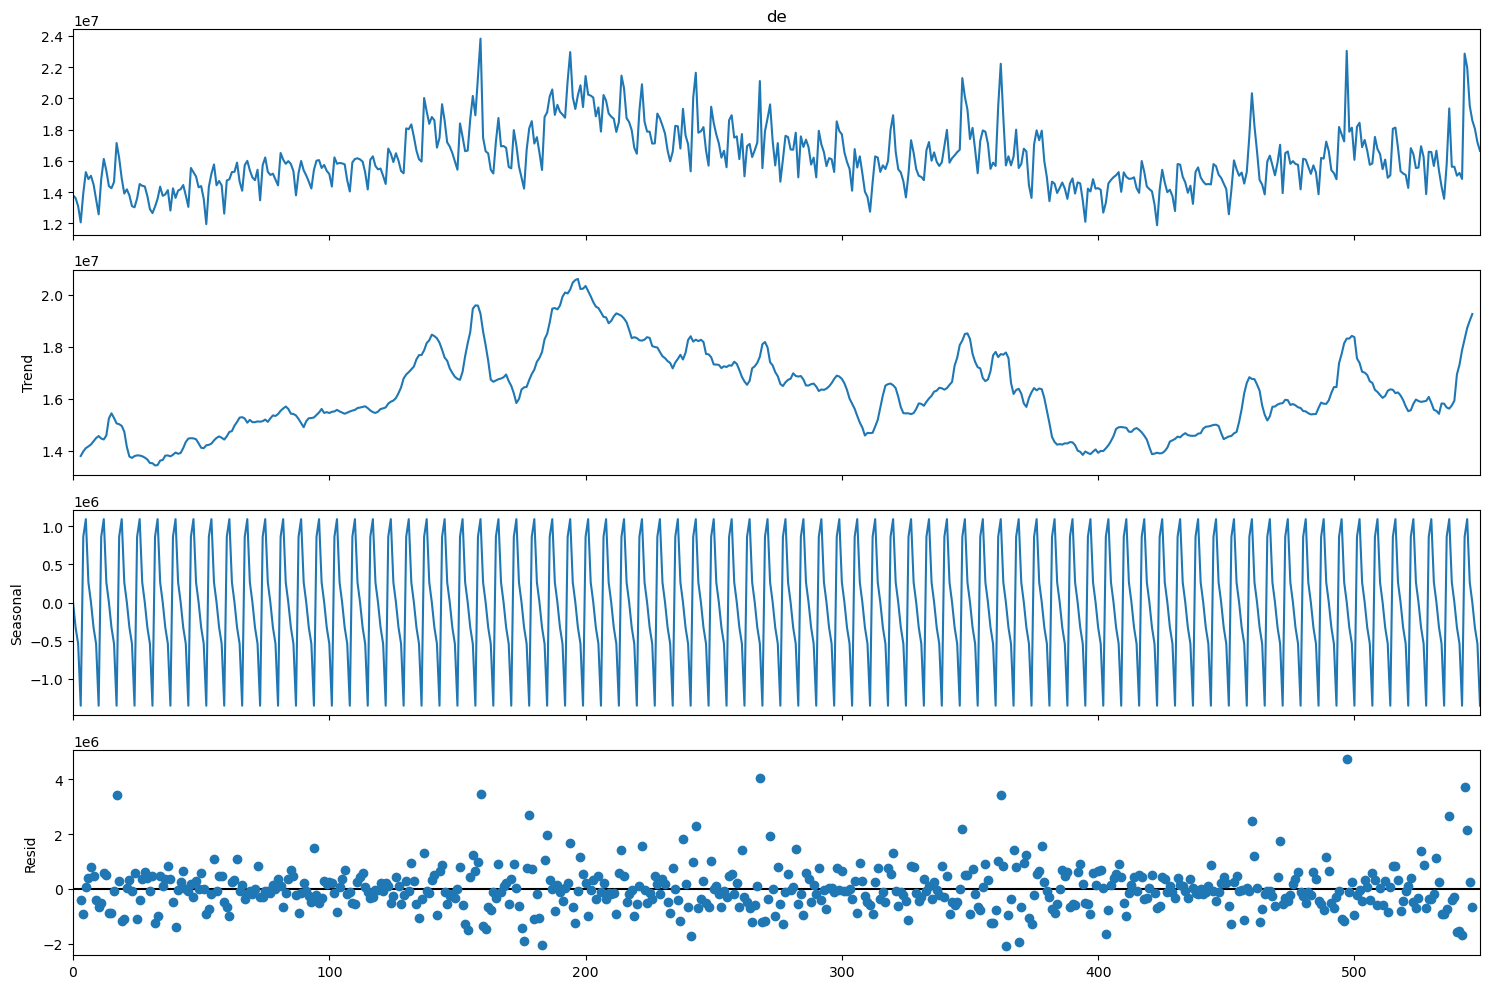

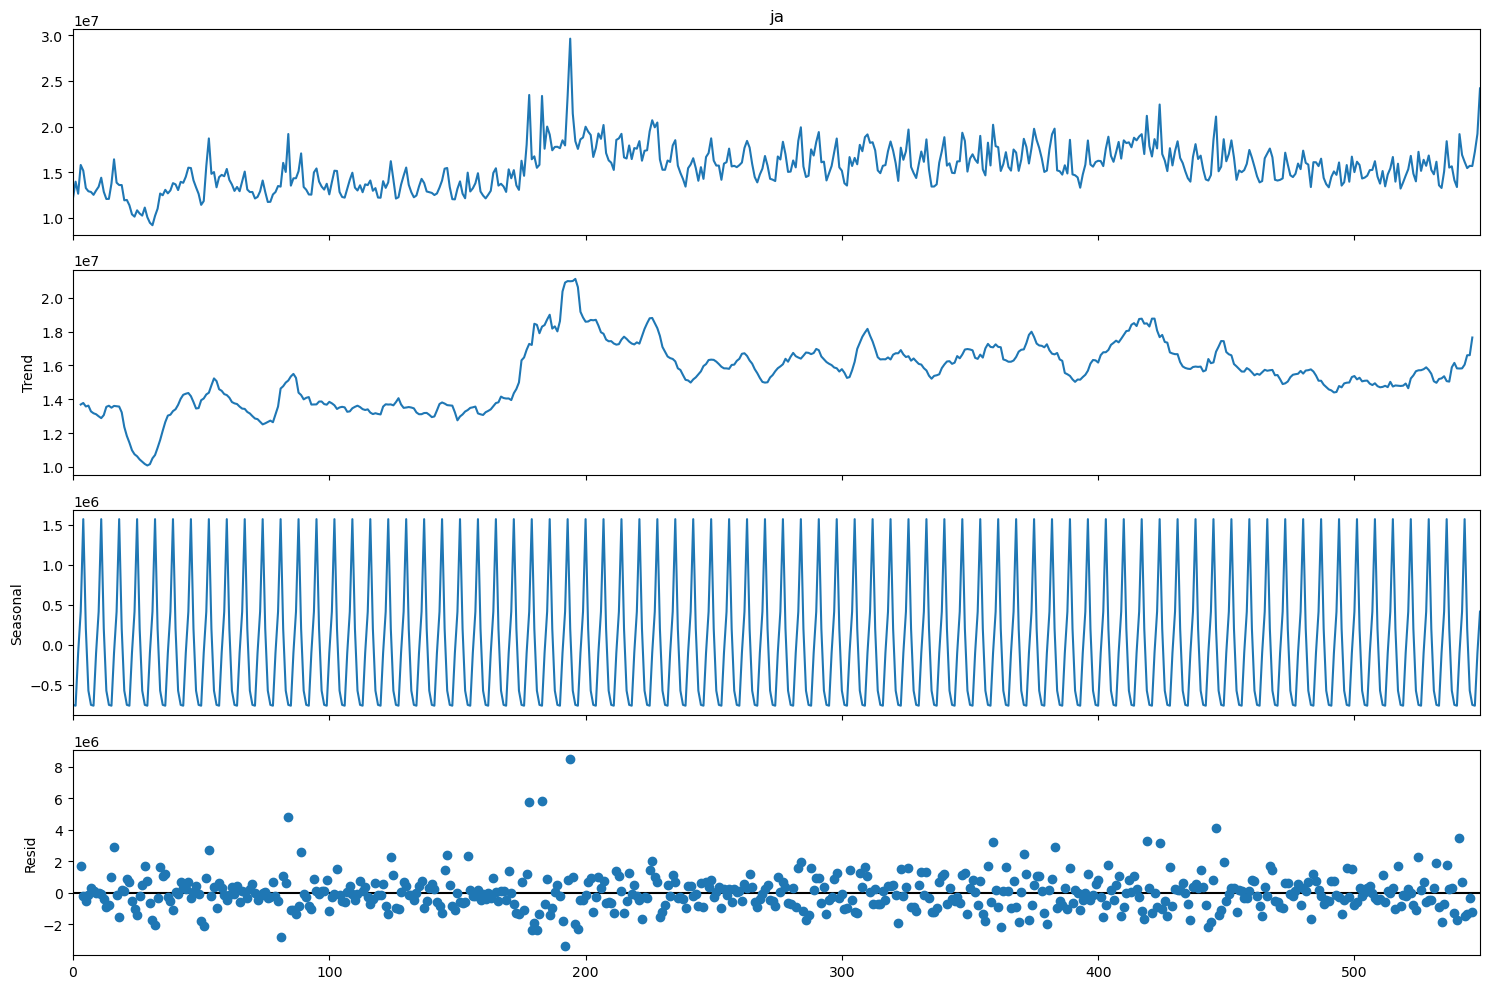

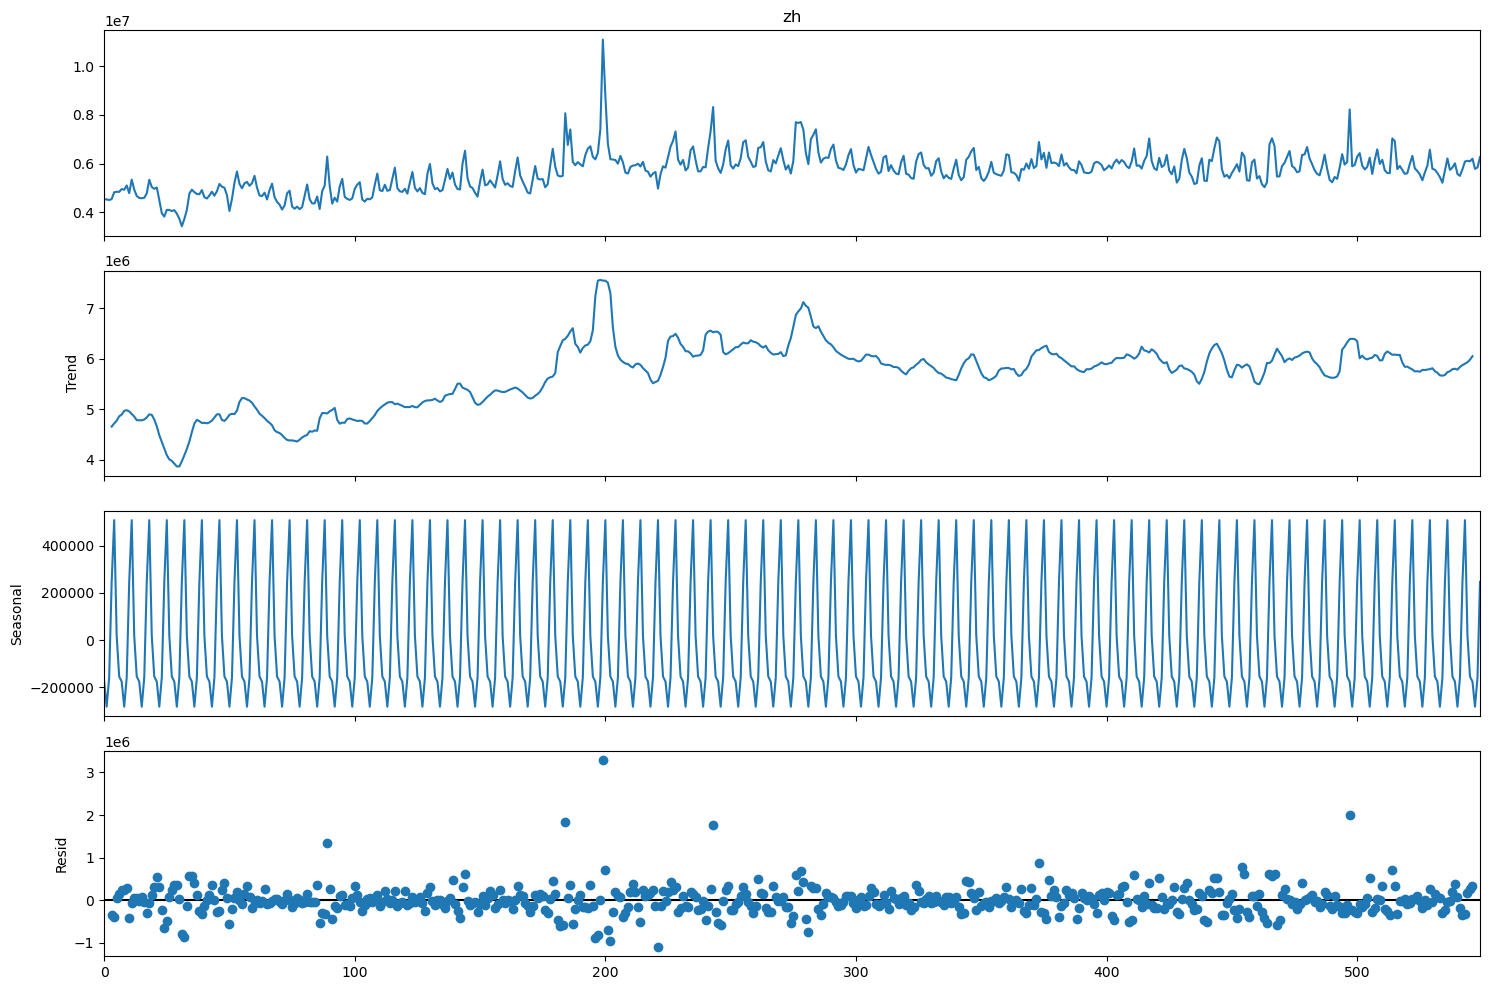

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = (15, 10)

stationary_cols=['en','de','ja','zh']
for col in stationary_cols:
    model = seasonal_decompose(df_pivoted[col], model='additive', period=7)
   
    model.plot();

<div style="font-size: 20px; text-align: justify;"><br><br>c. PACF plot with original time series without de-trending and de-seasoning. <br><br></div>

<Figure size 600x400 with 0 Axes>

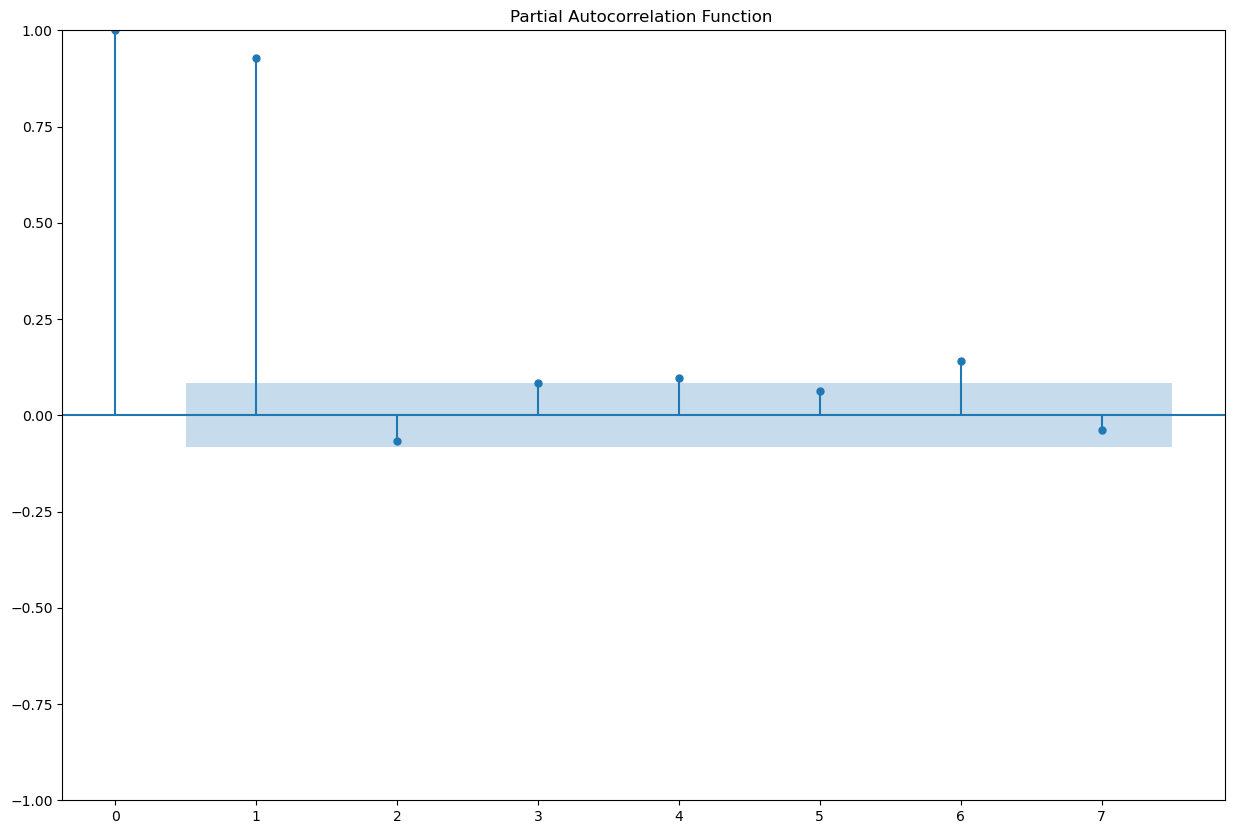

In [54]:
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf


plt.figure(figsize=(6,4))
plot_pacf(df_pivoted['en'].dropna(), lags=7, title='Partial Autocorrelation Function ')
plt.show()




<div style="font-size: 20px; text-align: justify;"><br><br><ul> PACF plot has a spike at lag 1 indicating that the value of the time series at time t has a strong dependency on its immediate past value at t−1. Rest of the values are very low suggesting that  once the immediate past value is accounted for, the values of the time series at these lags don’t have a significant impact on the value at time t.</ul> <br><br></div>

<div style="font-size: 20px; text-align: justify;"><br><br>d. ACF plot with de-trended and de-season time series. <br><br></div>

<Figure size 1000x600 with 0 Axes>

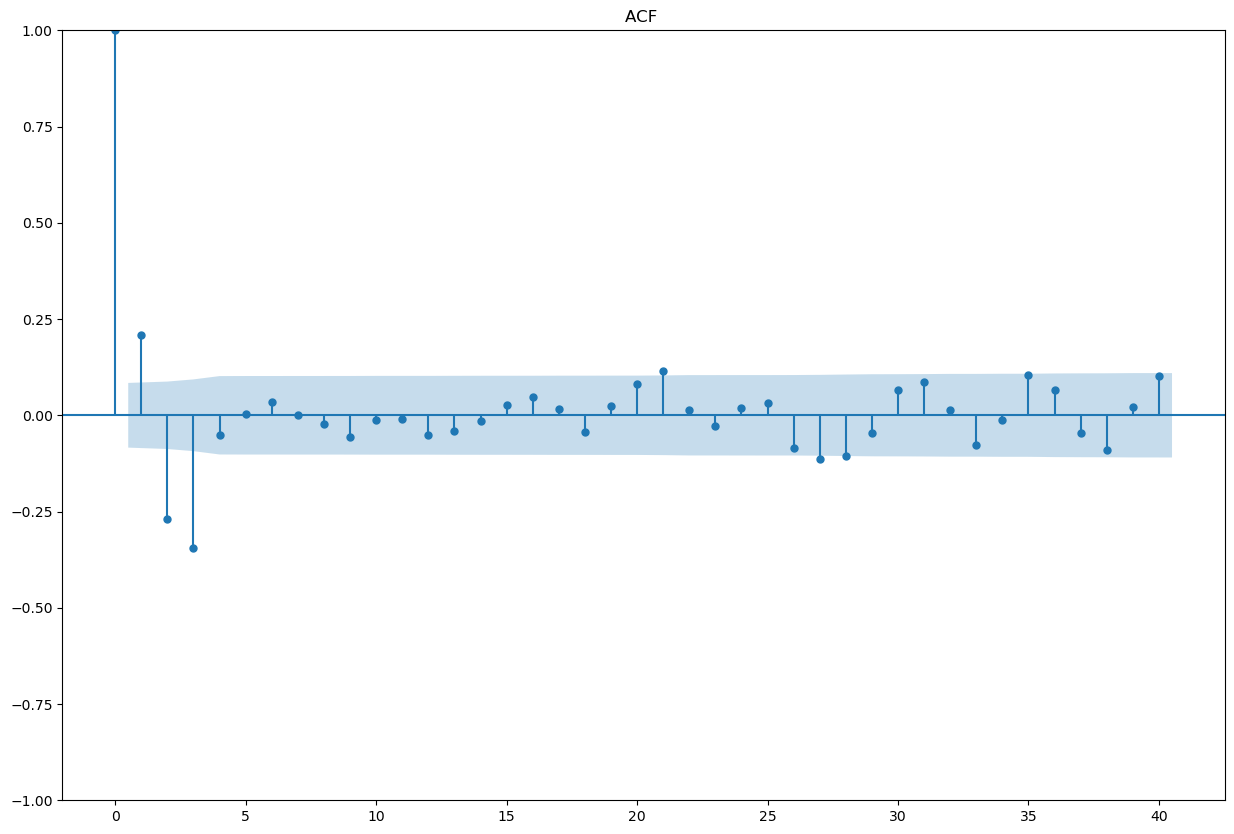

In [55]:
decomposition = seasonal_decompose(df_pivoted['en'], model='additive', period=7)
df_pivoted['Detrended'] = df_pivoted['en'] - decomposition.trend
df_pivoted['Deseasonalized'] = decomposition.resid 

plt.figure(figsize=(10, 6))
plot_acf(df_pivoted['Deseasonalized'].dropna(), lags=40, title='ACF ')
plt.show()

<div style="font-size: 20px; text-align: justify;"><br><br><ul>The plot shows that the auto correlations at initial lags are mostly non-significant, This suggests that there is little to no linear dependency between observations in these lags after removing seasonal effects.</ul> <br><br></div>

<br><br><div style="font-size: 20px; text-align: justify;"><br><br>4. .Model building and Evaluation. <br><br></div>

<div style="font-size: 20px; text-align: justify;"><br><br>a. Train-test split. <br><br></div>

<div style="font-size: 20px; text-align: justify;"><ul>Splitting the data into train and test set for the views of English language websites.</ul> <br><br></div>

In [56]:
df_pivoted['en']

0      8.752270e+07
1      8.724852e+07
2      8.297736e+07
3      8.627290e+07
4      8.900837e+07
           ...     
545    1.431992e+08
546    1.387030e+08
547    1.481438e+08
548    1.235752e+08
549    1.231453e+08
Name: en, Length: 550, dtype: float64

In [57]:
train = df_pivoted['en'].iloc[:-90]
test = df_pivoted['en'].iloc[-90:]

<div style="font-size: 20px; text-align: justify;"><br><br>b.  Creating and training the Arima model with p and q from ACF and PACF plot. <br><br></div>

In [58]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1,1,1))  
fit_model = model.fit()

fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     en   No. Observations:                  460
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7937.012
Date:                Sun, 03 Nov 2024   AIC                          15880.025
Time:                        01:19:34   BIC                          15892.412
Sample:                             0   HQIC                         15884.903
                                - 460                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3294      0.477     -0.691      0.490      -1.264       0.605
ma.L1          0.4092      0.478      0.856      0.392      -0.528       1.347
sigma2      6.181e+13      4e-15   1.54e+28      0.000    6.18e+13    6.18e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2443.47
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               3.95   Skew:                            -0.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.38e+44. Standard errors may be unstable.
"""

C:\Users\devip\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


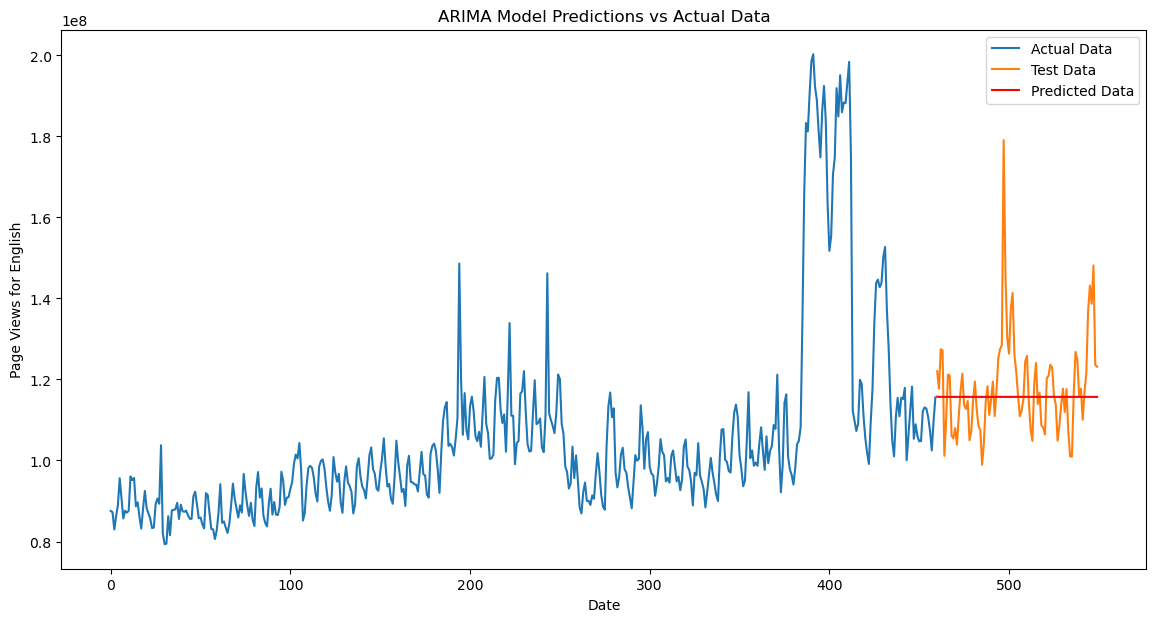

In [59]:
start = len(train)
end = len(train) + len(test) - 1
prediction = fit_model.predict(start=start, end=end, typ='levels')

plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Actual Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(prediction.index, prediction, label='Predicted Data', color='red')

plt.title('ARIMA Model Predictions vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Page Views for English')
plt.legend()
plt.show()

In [60]:
actual_values = test
errors = test - prediction.values
mape = np.mean(np.abs(errors)/ np.abs(actual_values))
rmse = np.sqrt(np.mean(errors**2))

print(f'MAPE of Model : {np.round(mape,3)}')
print(f'RMSE of Model : {np.round(rmse,3)}')

MAPE of Model : 0.068
RMSE of Model : 12267890.472


<div style="font-size: 20px; text-align: justify;"><br><br>c. Using exogenous variable with Sarimax model.<br><br></div>

In [61]:
exogdf=pd.DataFrame(ex.values,columns=['exog'])
exogdf.index=df_pivoted.index
exogdf

exog
0       0
1       0
2       0
3       0
4       0
..    ...
545     1
546     1
547     1
548     0
549     0

[550 rows x 1 columns]

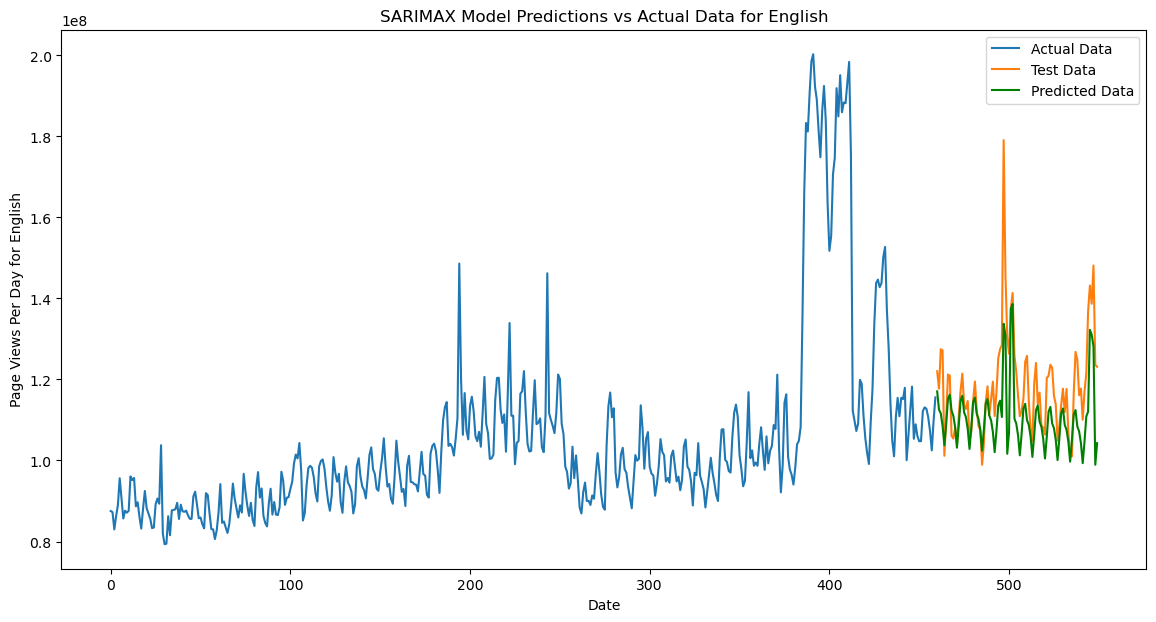

MAPE: 6.59%
RMSE: 11081253.07


In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

exog_train = exogdf.iloc[:-90]
exog_test = exogdf.iloc[-90:]

model = SARIMAX(train, 
                order=(1,1,1),              
                seasonal_order=(1,1,1,7), 
                exog=exog_train,           
                enforce_stationarity=False,
                enforce_invertibility=False)

sarimax_model = model.fit()


predictions = sarimax_model.get_forecast(steps=90, exog=exog_test)
predicted_means = predictions.predicted_mean
conf_int = predictions.conf_int()


plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Actual Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, predicted_means, label='Predicted Data', color='green')

plt.title('SARIMAX Model Predictions vs Actual Data for English')
plt.xlabel('Date')
plt.ylabel('Page Views Per Day for English')
plt.legend()
plt.show()


errors = test - predicted_means
mape = np.mean(np.abs(errors) / test) * 100
rmse = np.sqrt(np.mean(errors**2))

print(f'MAPE: {mape:.2f}%')
print(f'RMSE: {rmse:.2f}')

In [63]:
conf_int

lower en      upper en
460  1.015420e+08  1.325844e+08
461  9.080033e+07  1.343076e+08
462  8.492255e+07  1.383392e+08
463  7.779493e+07  1.393208e+08
464  6.933649e+07  1.382079e+08
..            ...           ...
545 -3.006759e+08  5.651855e+08
546 -3.083223e+08  5.704229e+08
547 -3.175460e+08  5.738801e+08
548 -3.530247e+08  5.509194e+08
549 -3.538592e+08  5.624185e+08

[90 rows x 2 columns]

<div style="font-size: 20px; text-align: justify;"><br><br><ul>Applying Sarimax for other languages.</ul><br><br></div>

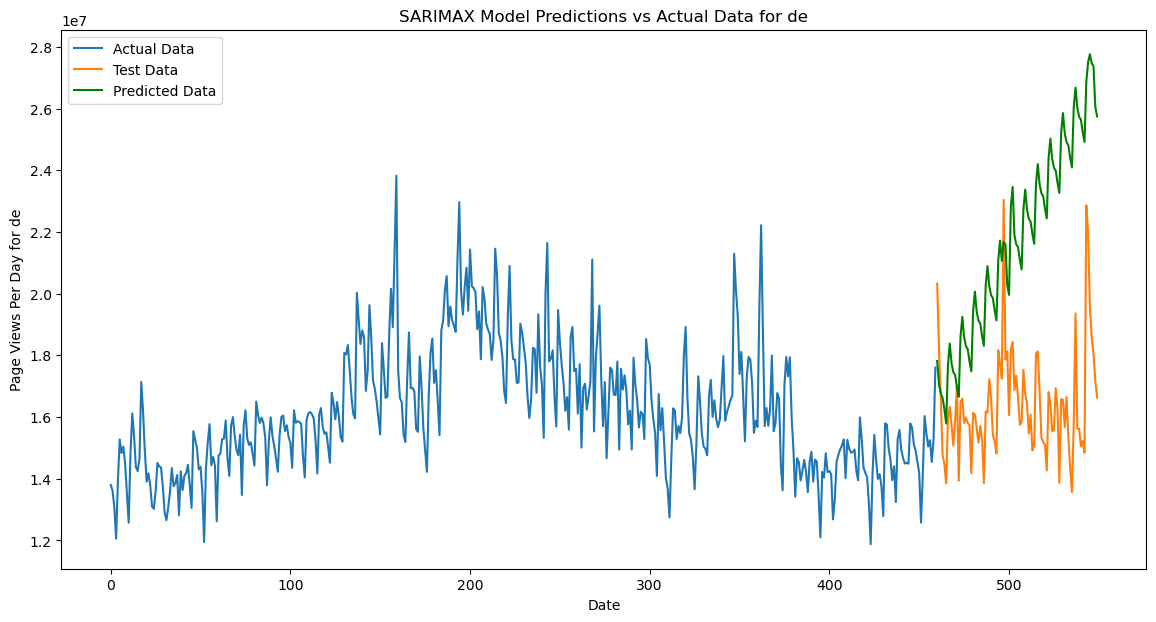

MAPE: 33.82%
RMSE: 6164156.55


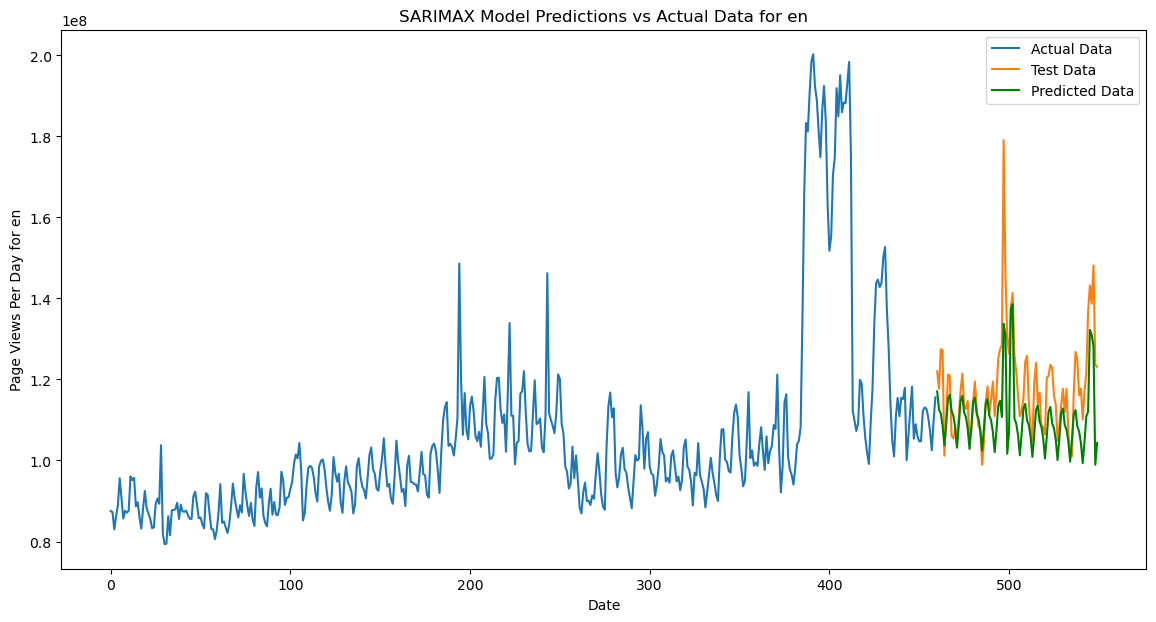

MAPE: 6.59%
RMSE: 11081253.07


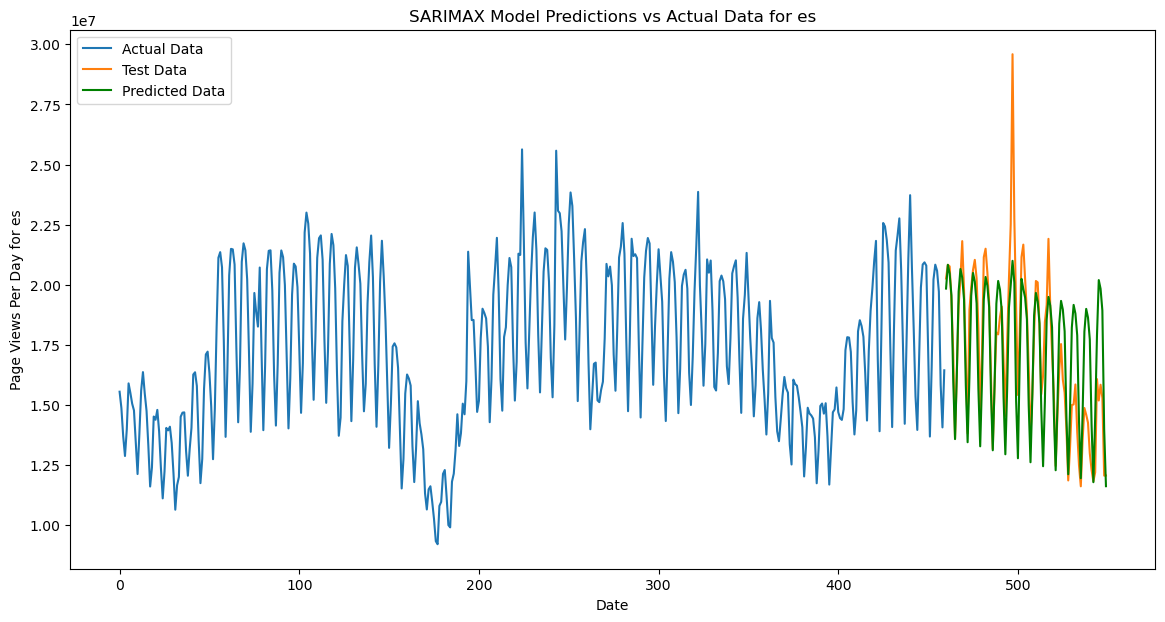

MAPE: 9.53%
RMSE: 2174262.34


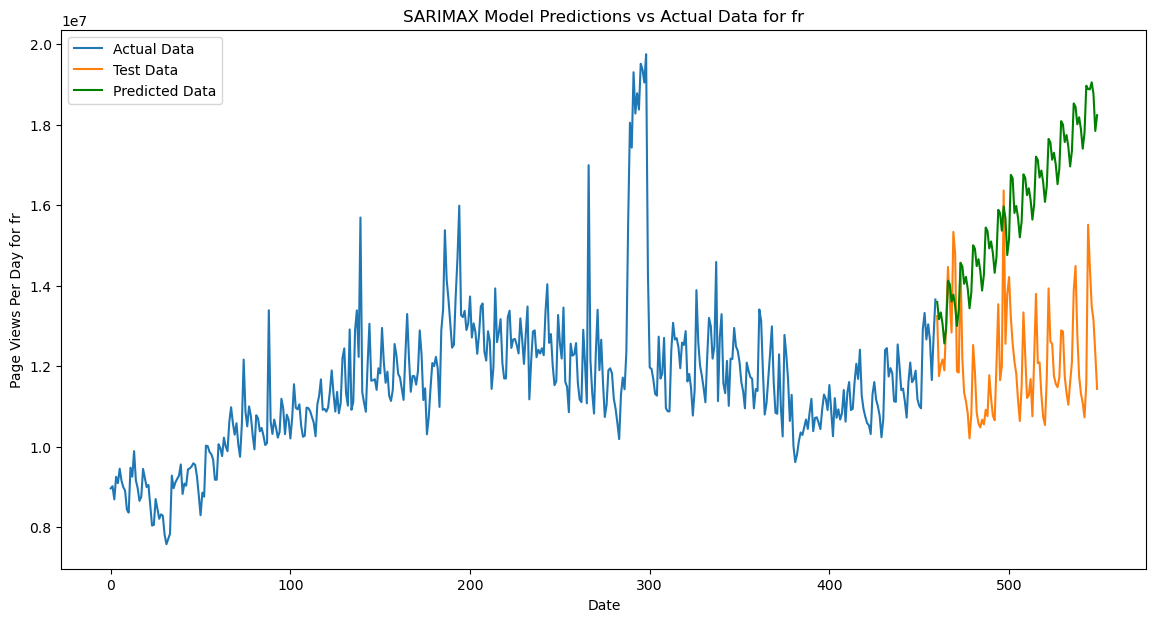

MAPE: 32.31%
RMSE: 4213507.12


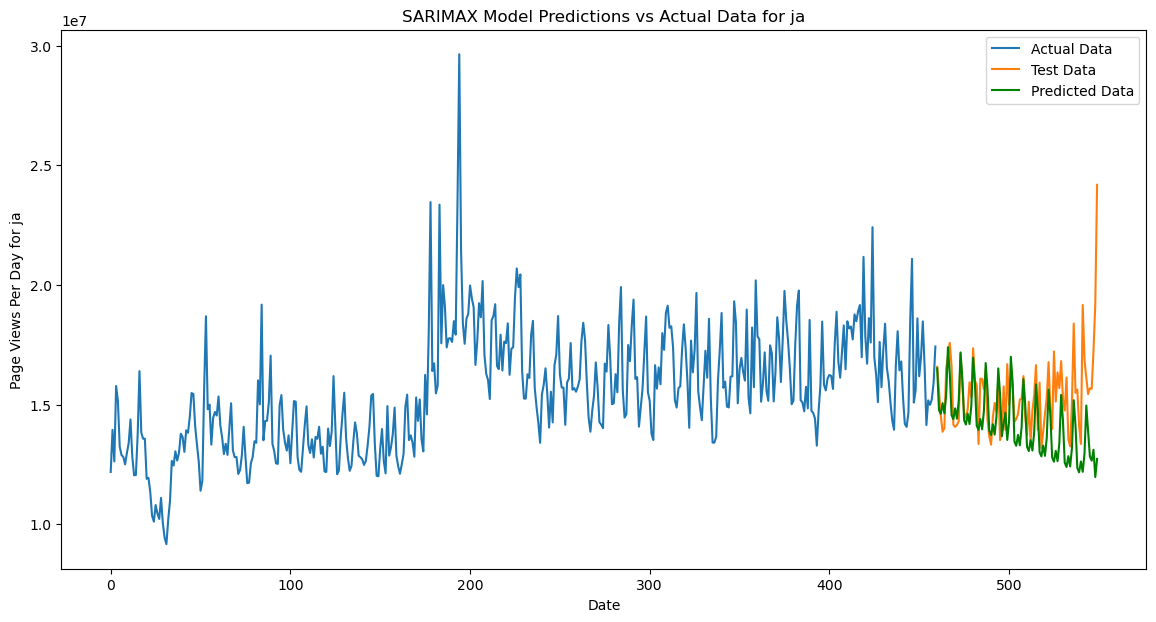

MAPE: 9.17%
RMSE: 2281095.98


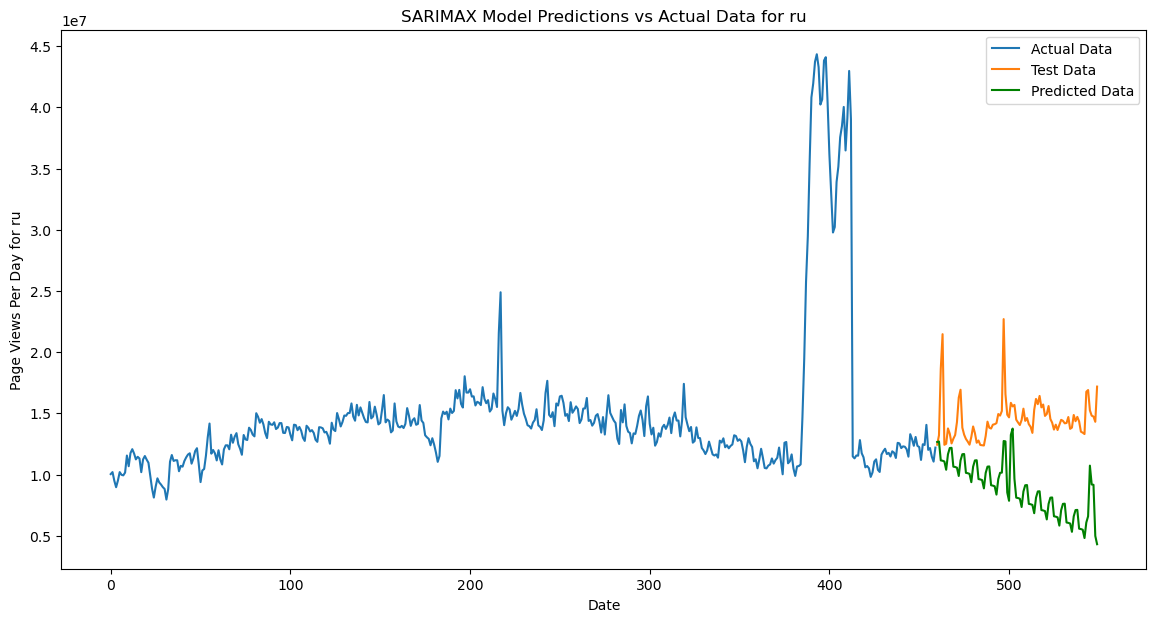

MAPE: 38.30%
RMSE: 6274500.49


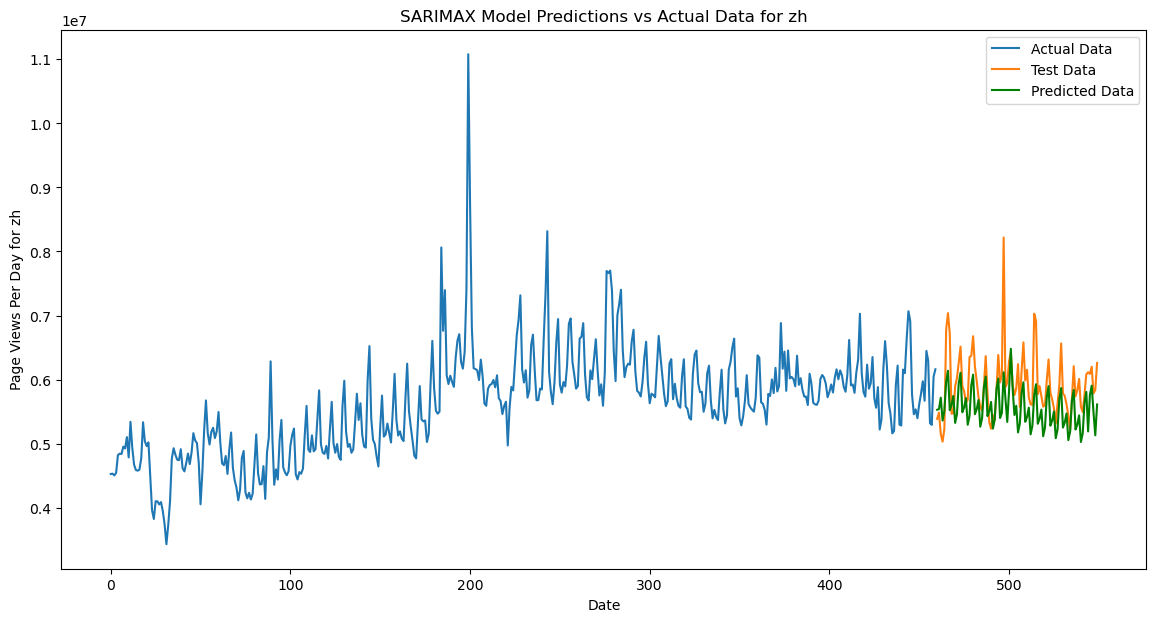

MAPE: 6.97%
RMSE: 534200.09


In [64]:
languages=['de', 'en', 'es', 'fr', 'ja', 'ru','zh']

exog_train = exogdf.iloc[:-90]
exog_test = exogdf.iloc[-90:]

train=df_pivoted[:-90]
test=df_pivoted[-90:]

for l in languages :

    model = SARIMAX(train[l], 
                    order=(1,1,1),              
                    seasonal_order=(1,1,1,7), 
                    exog=exog_train,           
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    sarimax_model = model.fit()


    predictions = sarimax_model.get_forecast(steps=90, exog=exog_test)
    predicted_means = predictions.predicted_mean
    conf_int = predictions.conf_int()


    plt.figure(figsize=(14, 7))
    plt.plot(train[l].index, train[l], label='Actual Data')
    plt.plot(test[l].index, test[l], label='Test Data')
    plt.plot(test[l].index, predicted_means, label='Predicted Data', color='green')

    plt.title(f'SARIMAX Model Predictions vs Actual Data for {l}')
    plt.xlabel('Date')
    plt.ylabel(f'Page Views Per Day for {l}')
    plt.legend()
    plt.show()


    errors = test[l] - predicted_means
    mape = np.mean(np.abs(errors) / test[l]) * 100
    rmse = np.sqrt(np.mean(errors**2))

    print(f'MAPE: {mape:.2f}%')
    print(f'RMSE: {rmse:.2f}')

<div style="font-size: 20px; text-align: justify;"><br><br>d. Using exogenous variable with Prophet.<br><br></div>

In [65]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ----- ---------------------------------- 1.8/13.3 MB 9.1 MB/s eta 0:00:02
   ---------- ----------------------------- 3.4/13.3 MB 10.1 MB/s eta 0:00:01
   ----------------- ---------------------- 5.8/13.3 MB 9.8 MB/s eta 0:00:01
   ------------------------ --------------- 8.1/13.3 MB 10.3 MB/s eta 0:00:01
   ----------------------------- ---------- 9.7/13.3 MB 10.1 MB/s eta 0:00:01
   ------------------------------------- -- 12.6/13.3 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 10.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 9.2 MB/s eta 0:00:00


In [71]:
df_prophet=df_pivoted[['Date','en']].rename({'Date':'ds','en':'y'},axis=1)
df_prophet['external_regressor']=pd.DataFrame(ex.values)

In [72]:
df_prophet

ds             y  external_regressor
0   2015-07-01  8.752270e+07                   0
1   2015-07-02  8.724852e+07                   0
2   2015-07-03  8.297736e+07                   0
3   2015-07-04  8.627290e+07                   0
4   2015-07-05  8.900837e+07                   0
..         ...           ...                 ...
545 2016-12-27  1.431992e+08                   1
546 2016-12-28  1.387030e+08                   1
547 2016-12-29  1.481438e+08                   1
548 2016-12-30  1.235752e+08                   0
549 2016-12-31  1.231453e+08                   0

[550 rows x 3 columns]

In [73]:
train=df_prophet[['ds','y']][:-90]
test=df_prophet[['ds','y' ]][-90:] 

exog_train=df_prophet[['external_regressor']][:-90]
exog_test=df_prophet[['external_regressor']][-90:]

In [ ]:
# from prophet import Prophet

# prophet_model = Prophet()
# prophet_model.add_regressor('external_regressor')


# train['external_regressor'] = exog_train['external_regressor'].values


# prophet_model.fit(train)


# future = prophet_model.make_future_dataframe(periods=90)

# future['external_regressor'] = pd.concat([train['external_regressor'], exog_test['external_regressor']], ignore_index=True)


# forecast = prophet_model.predict(future)


# fig1 = prophet_model.plot(forecast)
# plt.title('Forecast with External Regressor')
# plt.show()

# fig2 = prophet_model.plot_components(forecast)
# plt.show()


# test['predicted'] = forecast.iloc[-90:]['yhat'].values





# mape = np.mean(np.abs((test['y'] - test['predicted']) / test['y'])) * 100
# rmse = np.sqrt(mean_squared_error(test['y'], test['predicted']))

# print(f'MAPE: {mape:.2f}%')
# print(f'RMSE: {rmse:.2f}')


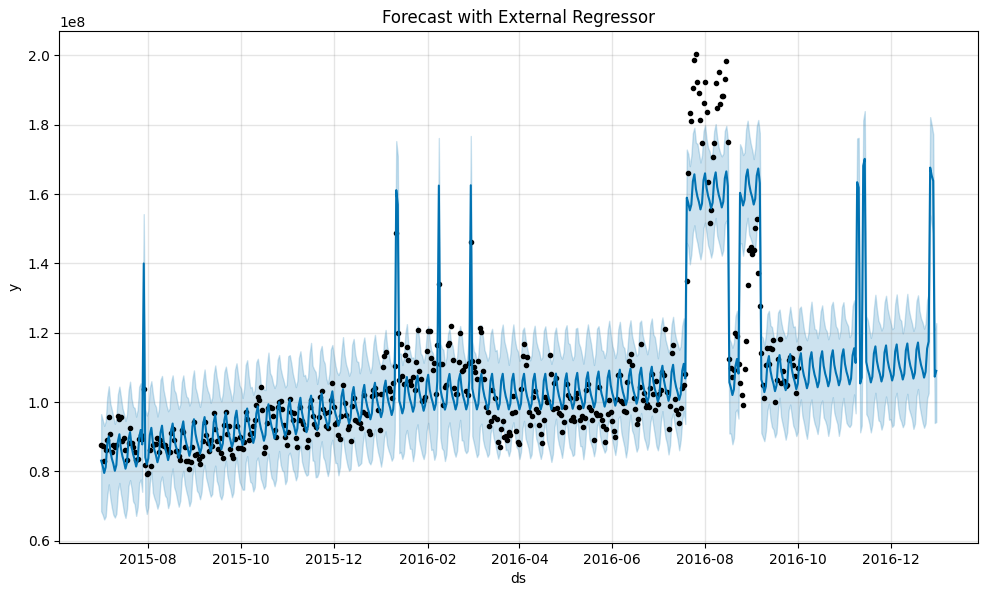
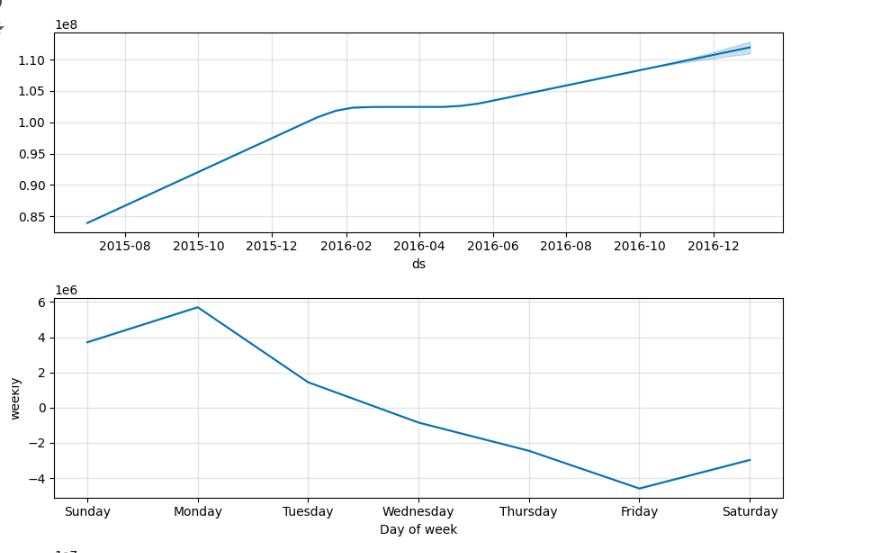
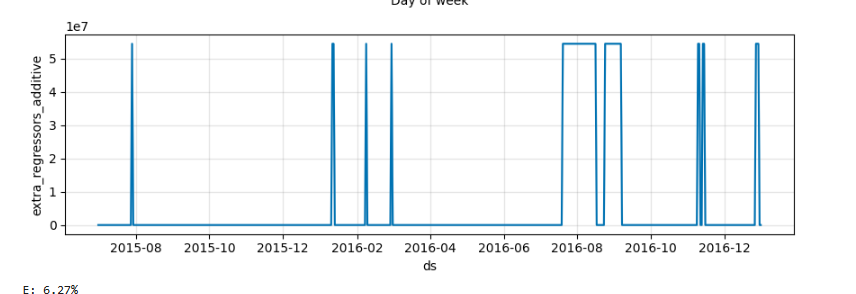

MAPE: 6.27%<br>
RMSE: 10559859.96


<div style="font-size: 20px; text-align: justify;"><br><br><br><br>Model Comparison<br><hr><br><br>ARIMA Model<br>
--------------------

Evaluation Metrics: MAPE of 6.8% and RMSE of 12,267,890.47<br><br>
ARIMA was the simplest model used. The ARIMA model couldnot capture complex seasonal patterns.<br><br><br><br>
SARIMAX Model<br>------------------------<br>
Evaluation Metrics: MAPE of 6.59% and RMSE of 11,081,169.77<br><br>
The performance is slightly improved with the onclusion of seasonal component and exogenous variable, making it more robust than ARIMA.<br><br><br><br>
Prophet Model<br>----------------------------------<br>

Used Prophet model with an external regressor.<br><br>
Evaluation Metrics: MAPE of 6.27% and RMSE of 10,559,859.96.<br><br>
Prophet provided the best performance, effectively handling seasonality and trends while incorporating external factors.<br><br><br><br>



</div>

<br><hr><br>

<div style="font-size: 30px; text-align: justify;"><br><br><ul>Insights</ul>
<hr><br></div>

<div style="font-size: 20px; text-align: justify;"><li>The dataset df has 145063 rows and 551 columns. The 145063 rows represent the wikipedia pages and 550 columns represent the dates. <br><br>

<li>The data of exogenous variables represents the dates which had a campaign or significant event that could affect the views for that day.<br><br>

<li>The dataset contains information from date 2015-07-01 to 2016-12-31. <br><br>

<li> Majority of the websites (16%) are in language English, followed by 14% in Japaneese.<br><br>
<li> Access type for majority websites is all access (51%), 25% are of mobile access and rest are desktop.<br><br>
<li>The Traffic type is all agents for 75% and spider for 25%.<br><br>

<li>We can see that Main page of Wikipedia from all access types are the most viewed pages.There is a spike in views of wikipedia main pages between July and September of 2016.<br><br>

<li> The months from July to December has more views compared to months in first half of the Year.<br><br>
<li>The year 2016 has more views recorded than 2015 .<br><br>

<li>That pages in the language English are having more number of views than other languages. Both English and Russian page views are having a spike between July to September 2016. <br><br>

<li>The languages Spanish , French and Russian are having stationary time series.  <br><br>

<li>PACF plot has a spike at lag 1 indicating that the value of the time series at time t has a strong dependency on its immediate past value at t−1. Rest of the values are very low suggesting that  once the immediate past value is accounted for, the values of the time series at these lags don’t have a significant impact on the value at time t. <br><br>

<li>The plot shows that the auto correlations at initial lags are mostly non-significant, This suggests that there is little to no linear dependency between observations in these lags after removing seasonal effects.<br><br>
<li>Prophet model performed best at forecasting future views, with the lowest MAPE and RMSE, followed by SARIMAX and ARIMA.<br><br>
    

</div>

<div style="font-size: 30px; text-align: justify;"><br><br><ul>Recommendations</ul>
<br><hr><br></div>

<div style="font-size: 20px; text-align: justify;"><li>Launching major ad campaigns between July and December, with special emphasis on July to September, when Wikipedia experiences spikes in traffic will increase the exposure to these ads to more viewers.<br><br>
<li> Since 16% of websites are in English, which represents the highest viewership by a large margin, prioritize ad placements on English pages. <br><br>
<li>As Japanese pages account for 14% of the total, they are the next best candidates for ad investment. Additionally, we can leverage the traffic spikes in Russian pages between July and September.<br><br>
<li>Wikipedia Main Page and other high-traffic pages should be prioritized for ad placement across all access types. <br><br>

<li> With 51% of traffic coming from all-access types, ensure ad formats are adaptable for both mobile and desktop users. This will improve the ad's reach and user experience across devices.<br><br>
<li>As 25% of the traffic is from mobile, implement a mobile-first design strategy ensuring that content loads quickly and display seamlessly on mobile devices.<br><br>

<li> Use the Prophet model or SARIMAX model to forecast page views accurately. These model has shown the best performance.<br><br>
<li>Incorporate external events and campaigns as exogenous variables to predict significant fluctuations in traffic. This will help to predict the viewership better.<br><br>

<li> As per the PACF analysis, the dependency on recent past values is very high. we can schedule ad campaigns based on recent traffic trends.<br><br>
<li>For languages like Spanish, French, and Russian which have stationary time series, maintaining a consistent number of ads will be good as their traffic patterns are stable.
<br><br>
    

</div>